In [1]:
import pandas as pd  # Importación prioritaria para manipular datos
import numpy as np  # Importación prioritaria para cálculos numéricos y matrices

# Librerías para preprocesamiento de datos
from sklearn.impute import SimpleImputer  # Imputación de valores faltantes
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Codificación categórica y escalado

# Librerías para modelos de aprendizaje automático
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  # Correcto nombre para regresión logística
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# Librerías para evaluación de modelos
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    make_scorer
)

# Librerías para selección de modelos y optimización
from sklearn.model_selection import GridSearchCV, train_test_split

# Librerías para visualización (opcional)
import seaborn as sns  # Visualizaciones atractivas (opcional)
import matplotlib.pyplot as plt  # Gráficos básicos (opcional)
# ... (otras librerías de visualización opcionales)

# Organiza las importaciones por funcionalidad
# (opcional, pero mejora la legibilidad)

# Opcionalmente, podemos desactivar las advertencias durante la ejecución del código:
import warnings
warnings.filterwarnings('ignore')  # Ten cuidado, algunas advertencias pueden indicar problemas
# Establecemos un estilo predeterminado para los gráficos de matplotlib:
plt.style.use('fivethirtyeight')  # Estilo similar al utilizado por FiveThirtyEight


C:\Users\Aleja\AppData\Local\Temp\ipykernel_27736\4265900380.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Importación prioritaria para manipular datos


In [2]:
data_original =pd.read_csv('./Data/water_potability.csv')
data = data_original.copy()
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Transformar el tipo de dato de la columnna Potability

In [5]:
# Convertir la columna 'valor' a booleana (considerando 0 como False y el resto como True)
data['Potability'] = data['Potability'].astype(bool)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   bool   
dtypes: bool(1), float64(9)
memory usage: 233.7 KB
None


In [6]:
print(f"El dataset contiene {data.shape[0]} registros y {data.shape[1]} características.")

El dataset contiene 3276 registros y 10 características.


## Valores Null

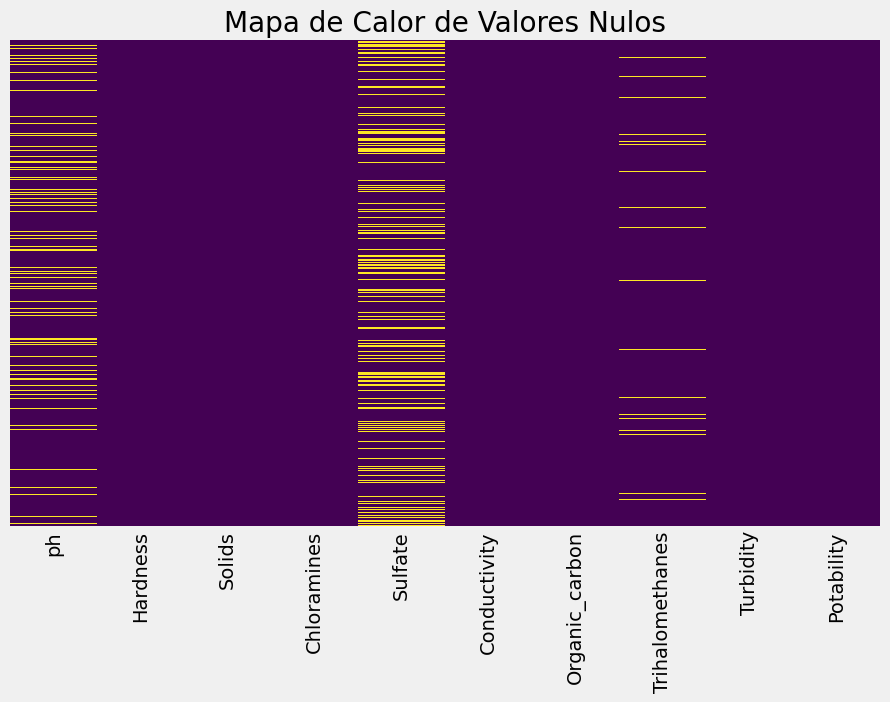

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [8]:
# Iterar sobre las columnas del DataFrame
for column in data.columns:
    # Contar los valores nulos en la columna actual
    null_count = data[column].isnull().sum()
    null_percentage = null_count/data[column].count().round(2)*100
    # Imprimir un mensaje si hay valores nulos
    if null_count > 0:
        print(f"Hay {null_count} valores nulos en la columna '{column}', lo que significa un {null_percentage:.2f}% de los datos")

Hay 491 valores nulos en la columna 'ph', lo que significa un 17.63% de los datos
Hay 781 valores nulos en la columna 'Sulfate', lo que significa un 31.30% de los datos
Hay 162 valores nulos en la columna 'Trihalomethanes', lo que significa un 5.20% de los datos


## Limpiando valores Null

### PH

In [9]:
data['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [10]:
# Calcular la media del pH
media_ph = data['ph'].mean()

# Calcular la mediana del pH
mediana_ph = data['ph'].median()

# Imprimir los resultados
print(f"La media del pH es: {media_ph:.2f}")
print(f"La mediana del pH es: {mediana_ph:.2f}")

La media del pH es: 7.08
La mediana del pH es: 7.04


Al no existir una gran varianza entre la media y la mediana se decide rellenar los valores faltantes con la media.

In [11]:
# Rellenar los valores nulos de la columna 'ph' con la media
data['ph_rellenado_media'] = data['ph'].fillna(data['ph'].mean())

# Verificar si quedan valores nulos en la columna rellenada
print(f"Número de valores nulos en 'ph_rellenado_media': {data['ph_rellenado_media'].isnull().sum()}")

Número de valores nulos en 'ph_rellenado_media': 0


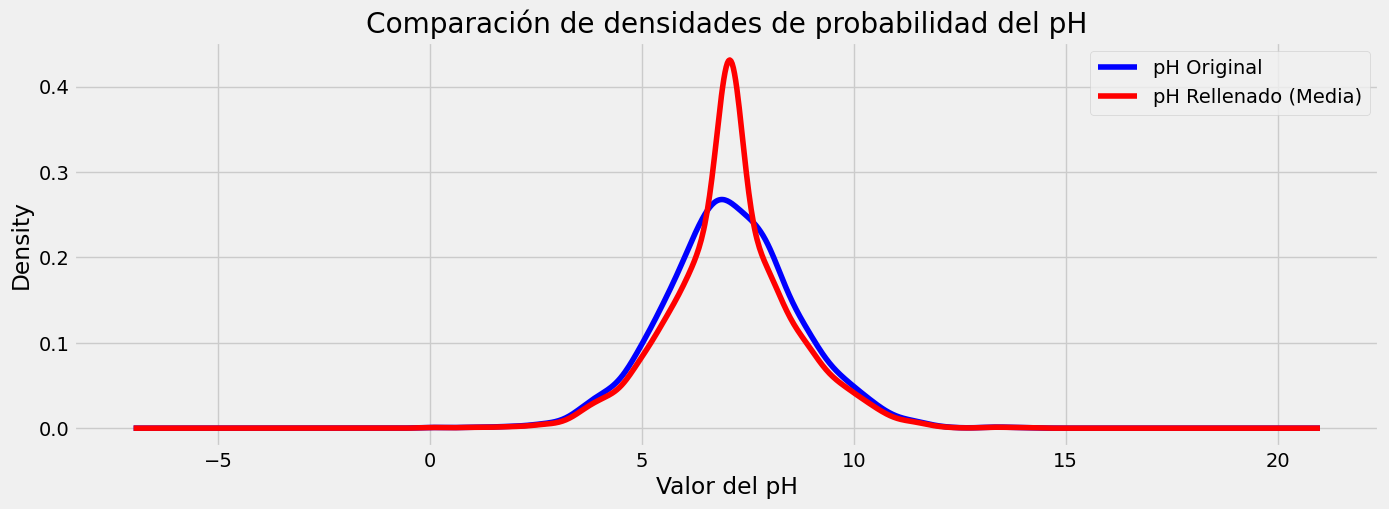

In [12]:
# Crear una figura para el gráfico
fig, ax = plt.subplots(figsize=(15, 5))

# Diagrama de densidad de probabilidad (KDE) para 'ph' original
data['ph'].plot(kind='kde', ax=ax, label='pH Original', color='blue')

# Diagrama de densidad de probabilidad (KDE) para 'ph_rellenado_media'
data['ph_rellenado_media'].plot(kind='kde', ax=ax, label='pH Rellenado (Media)', color='red')

# Añadir leyenda
ax.legend(loc='best')

# Título y etiquetas para el eje x
plt.title('Comparación de densidades de probabilidad del pH')
plt.xlabel('Valor del pH')

# Mostrar el gráfico
plt.show()

## Análisis del gráfico de densidad del pH por la media
* La imputación por la media ha aumentado ligeramente la variabilidad y las colas de la distribución.
* Considerar otras técnicas de imputación para un análisis más robusto.

**Conclusión:** El gráfico muestra que rellenar los valores faltantes con la media puede alterar la distribución original de los datos, especialmente en las colas.

Número de valores nulos en 'ph' con método linear: 1
   ph  ph_linear
0 NaN        NaN


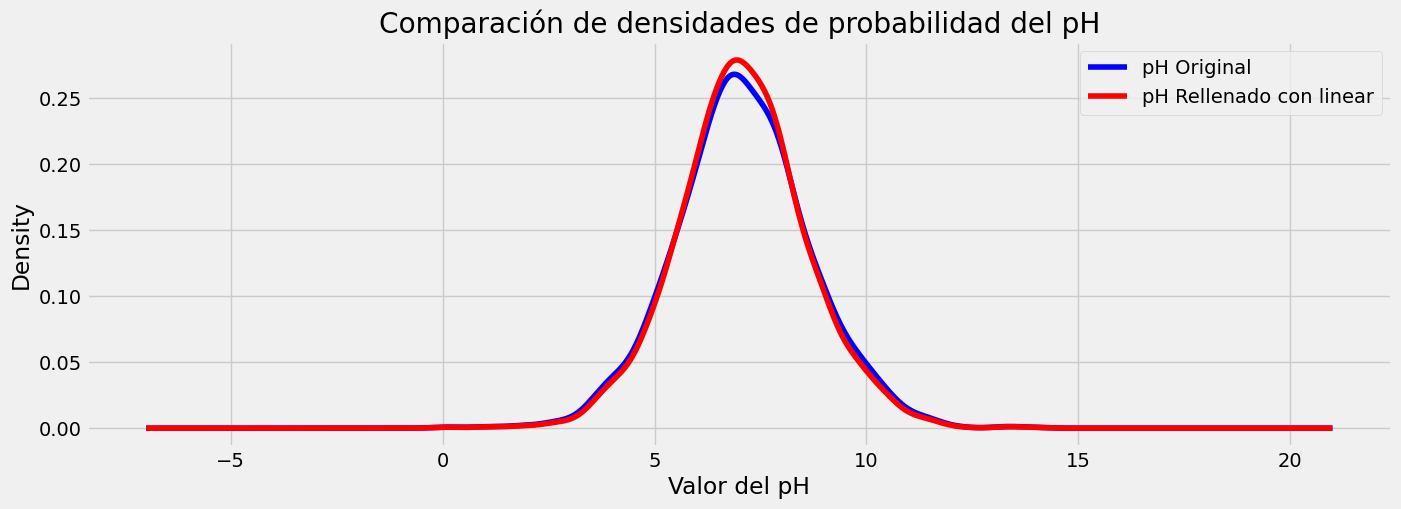

Número de valores nulos en 'ph' con método quadratic: 1
   ph  ph_linear  ph_quadratic
0 NaN        NaN           NaN


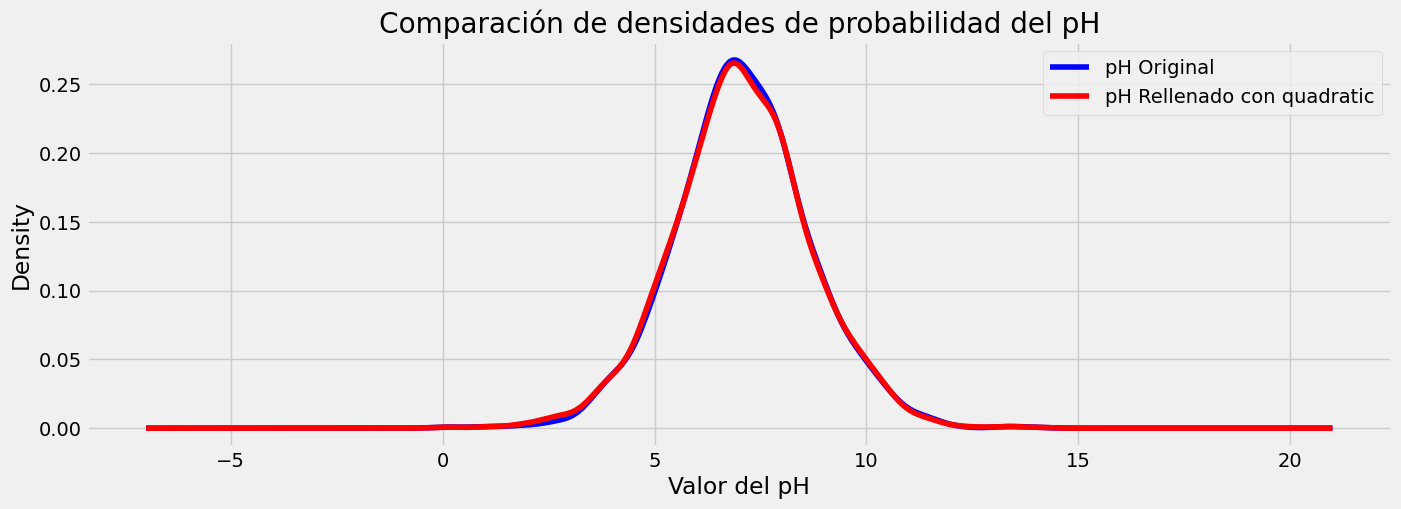

Número de valores nulos en 'ph' con método cubic: 1
   ph  ph_linear  ph_quadratic  ph_cubic
0 NaN        NaN           NaN       NaN


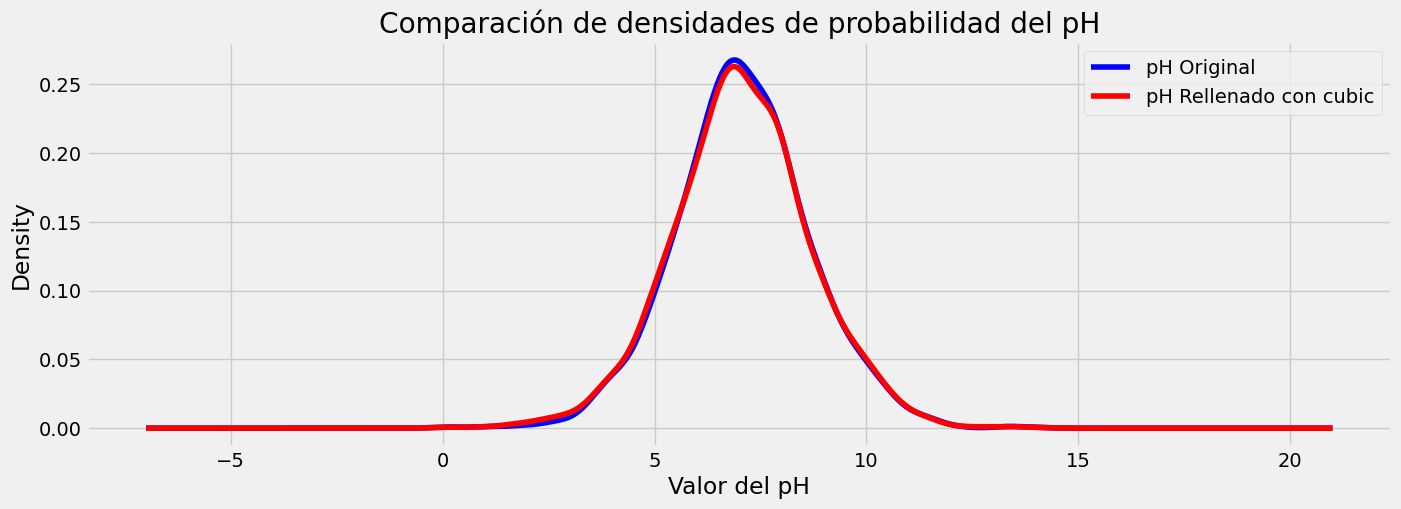

Número de valores nulos en 'ph' con método spline: 1
   ph  ph_linear  ph_quadratic  ph_cubic  ph_spline
0 NaN        NaN           NaN       NaN        NaN


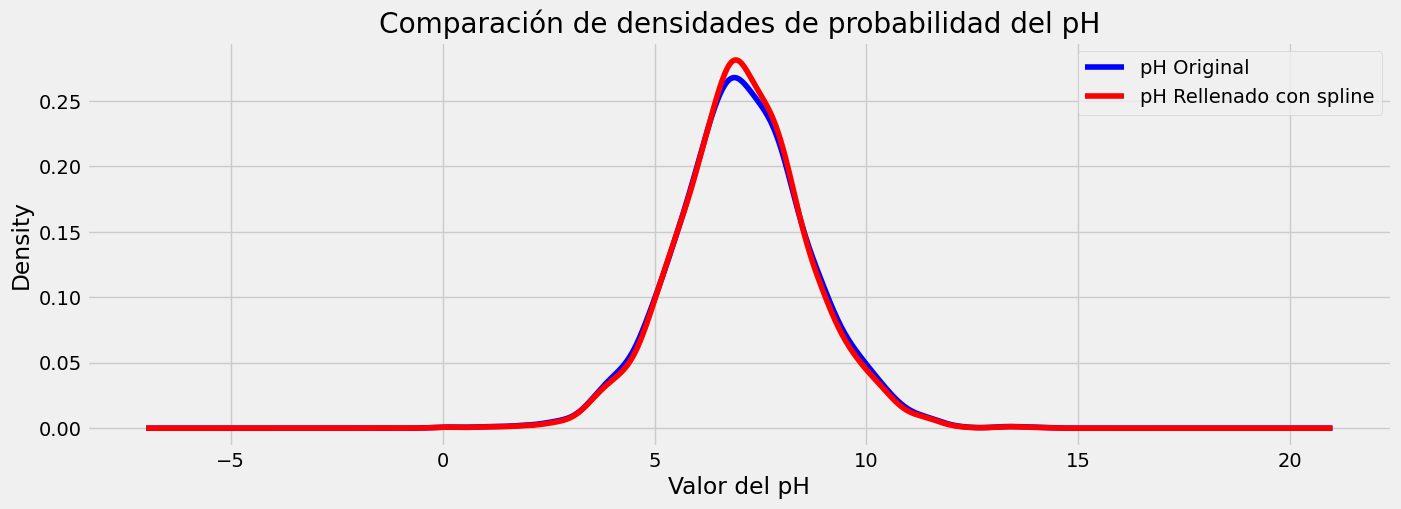

Número de valores nulos en 'ph' con método akima: 1
   ph  ph_linear  ph_quadratic  ph_cubic  ph_spline  ph_akima
0 NaN        NaN           NaN       NaN        NaN       NaN


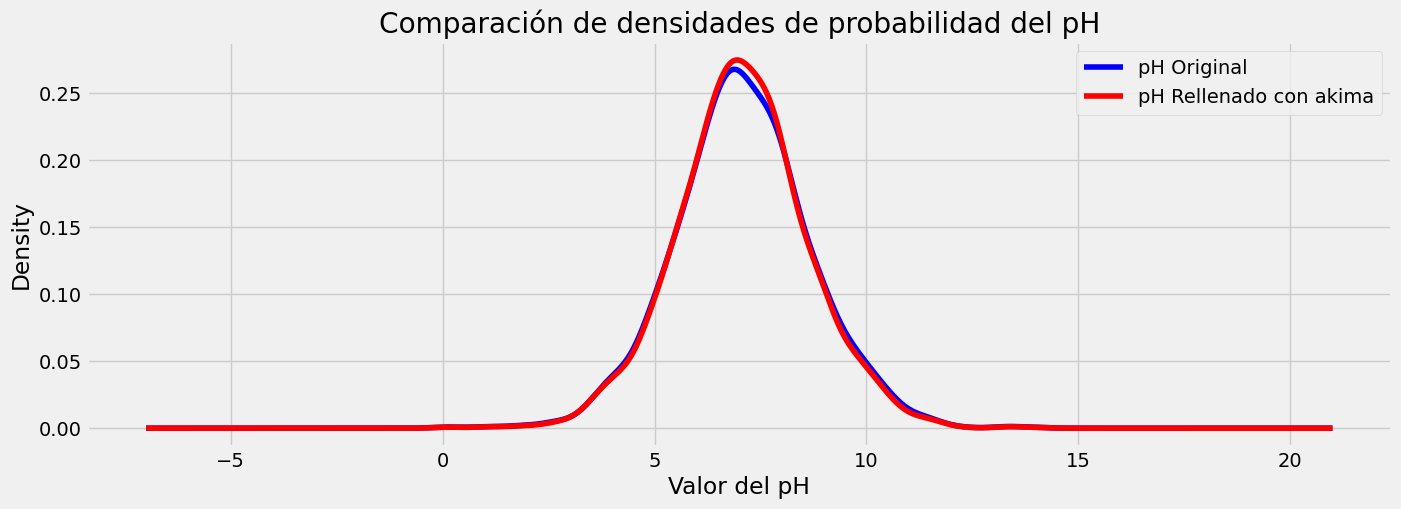

In [13]:
# Lista de métodos de interpolación a probar
methods = ['linear', 'quadratic', 'cubic', 'spline','akima']

data_ph = pd.DataFrame(data['ph'])

# Iterar sobre los métodos y crear gráficos para comparar
for method in methods:
    # Crear una copia del DataFrame para no modificar el original
        
    # Interpolar los valores nulos usando el método actual
    if method == 'spline':
        data_ph[f'ph_{method}'] = data_ph['ph'].interpolate(method=method, order=3)
    else:
        data_ph[f'ph_{method}'] = data_ph['ph'].interpolate(method=method)
    # Verificar si quedan valores nulos
    print(f"Número de valores nulos en 'ph' con método {method}: {data_ph[f'ph_{method}'].isnull().sum()}")
    print(data_ph[data_ph[f'ph_{method}'].isnull()])
    
    # Crear un gráfico para visualizar la interpolación
    fig, ax = plt.subplots(figsize=(15, 5))
    # Diagrama de densidad de probabilidad (KDE) para 'ph' original
    data_ph['ph'].plot(kind='kde', ax=ax, label='pH Original', color='blue')
    # Diagrama de densidad de probabilidad (KDE) para 'ph' interpolado
    data_ph[f'ph_{method}'].plot(kind='kde', ax=ax, label=f'pH Rellenado con {method}', color='red')
    # Añadir leyenda
    ax.legend(loc='best')
    # Título y etiquetas para el eje x
    plt.title('Comparación de densidades de probabilidad del pH')
    plt.xlabel('Valor del pH')
    # Mostrar el gráfico
    plt.show()

## Análisis del gráfico de densidad del pH por la interpolación

Las gráficas presentadas comparan la distribución de probabilidad del pH original con las distribuciones obtenidas después de rellenar los valores faltantes utilizando diferentes métodos de interpolación: *linear*, *quadratic*, *cubic*, *spline*, *akima*. Esto nos permite evaluar la efectividad de cada método en preservar las características principales de la distribución original y su impacto en el análisis posterior de los datos.

**Conclusión:**  La gráfica sugiere que el método de interpolación cuadrática ha sido exitoso en preservar las características principales de la distribución del pH. 

En resumen, el gráfico sugiere que la interpolación ha sido una estrategia exitosa para tratar los valores faltantes en la variable pH. Ahora realizaremos la misma tarea para las caracteristicas restantes.

Rellenando los valores faltantes con la interpolación cuadrática. 

In [14]:
def imputar_nan(df, variable):
  """
  Esta función imputa valores faltantes en una columna del DataFrame utilizando 
  interpolación cuadrática y genera una gráfica para visualizar las distribuciones de 
  probabilidad de los datos originales e interpolados.

  Args:
      df (pandas.DataFrame): El DataFrame que contiene la columna con valores faltantes.
      variable (str): El nombre de la columna en la que se realizará la imputación.

  Returns:
      pandas.DataFrame: El DataFrame modificado con la nueva columna que contiene los valores interpolados.
  """
  # Crea una nueva columna con el sufijo "_cuadratica" para los valores interpolados
  df[variable + "_cuadratica"] = df[variable].interpolate(method='quadratic')

  # Crea una figura y un subplot para la visualización
  fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura (opcional)

  # Genera la gráfica de densidad de probabilidad (KDE) para los datos originales
  df[variable].plot(kind='kde', ax=ax, label='Datos originales', color='blue')

  # Genera la gráfica de densidad de probabilidad (KDE) para los datos interpolados
  df[variable + "_cuadratica"].plot(kind='kde', ax=ax, label='Datos interpolados', color='green')

  # Añade título, etiquetas para los ejes y leyenda a la gráfica
  ax.set_title('Distribución de probabilidad del pH (original e interpolado)')
  ax.set_xlabel('Valor del pH')
  ax.set_ylabel('Densidad de probabilidad')
  ax.legend()

  # Muestra la gráfica
  plt.show()
  return df

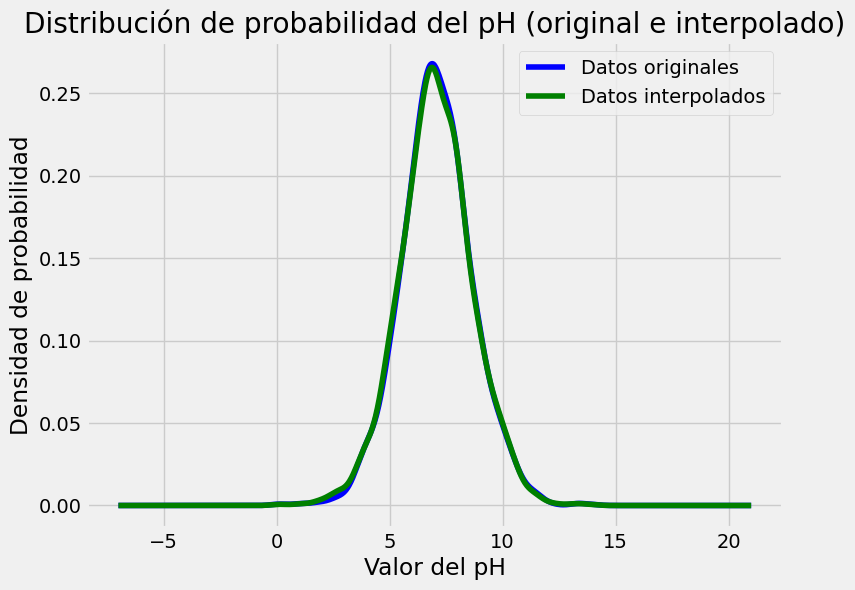

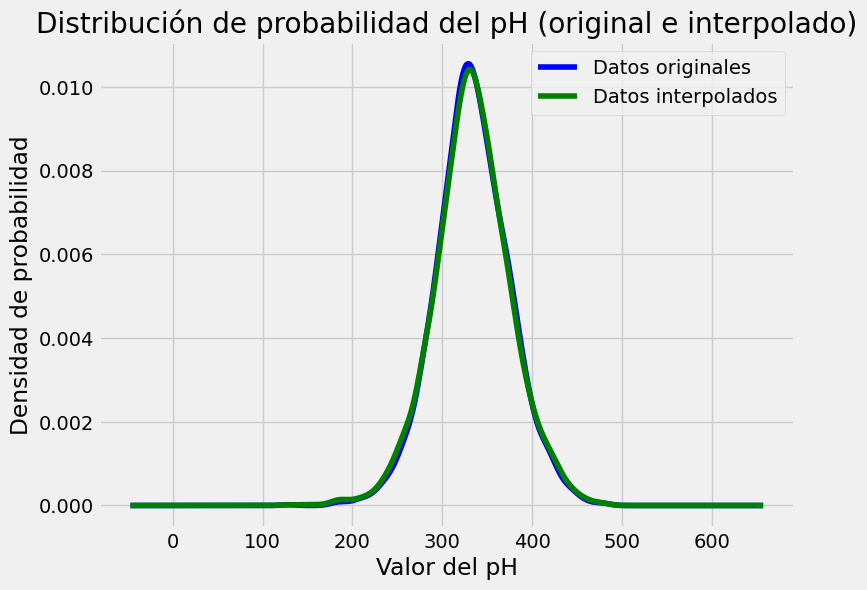

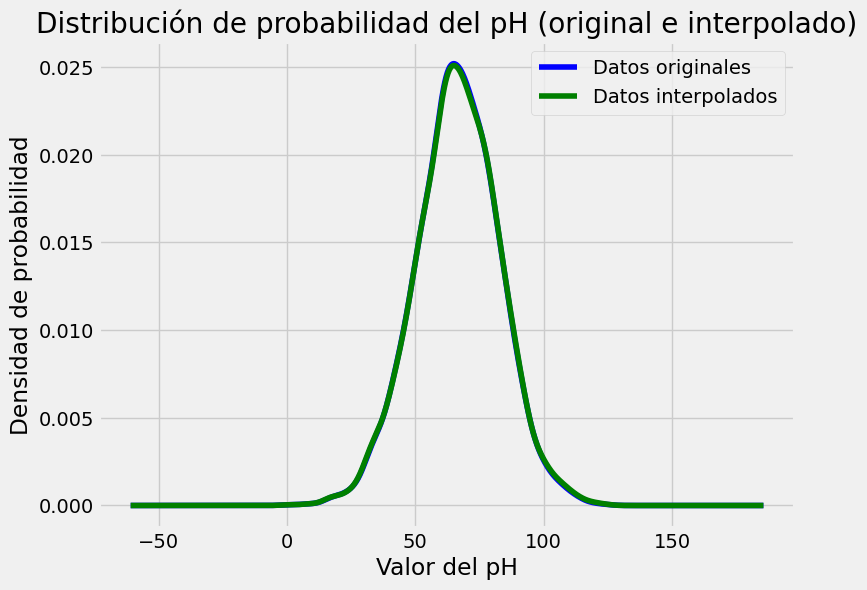

ph                            491
Hardness                        0
Solids                          0
Chloramines                     0
Sulfate                       781
Conductivity                    0
Organic_carbon                  0
Trihalomethanes               162
Turbidity                       0
Potability                      0
ph_rellenado_media              0
ph_cuadratica                   1
Sulfate_cuadratica              4
Trihalomethanes_cuadratica      0
dtype: int64


In [15]:
columns = ['ph','Sulfate','Trihalomethanes']  # Columnas seleccionadas para imputación

# Iterar sobre las columnas seleccionadas y aplicar la función de imputación
for column in columns:
    imputar_nan(data, column)  # Llama a la función para imputar valores faltantes en la columna especificada

# Verificar la cantidad de valores nulos restantes en el DataFrame
print(data.isnull().sum())  # Imprime el conteo de valores nulos por columna

In [16]:
# Eliminamos las columnas que originalmente tenian valores nulos.
data=data.drop(['ph','Sulfate','Trihalomethanes','ph_rellenado_media'],axis=1)

# También hemos visto que tras la limpieza de los datos seguimos teniendo valores nulos, estos al yo no ser significativos se elige eliminarlos.
data.dropna(inplace=True)

# Por último verificamos que ya no tenemos valores nulos en nuestro data frame.

data.isnull().sum()

Hardness                      0
Solids                        0
Chloramines                   0
Conductivity                  0
Organic_carbon                0
Turbidity                     0
Potability                    0
ph_cuadratica                 0
Sulfate_cuadratica            0
Trihalomethanes_cuadratica    0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3271 entries, 1 to 3271
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hardness                    3271 non-null   float64
 1   Solids                      3271 non-null   float64
 2   Chloramines                 3271 non-null   float64
 3   Conductivity                3271 non-null   float64
 4   Organic_carbon              3271 non-null   float64
 5   Turbidity                   3271 non-null   float64
 6   Potability                  3271 non-null   bool   
 7   ph_cuadratica               3271 non-null   float64
 8   Sulfate_cuadratica          3271 non-null   float64
 9   Trihalomethanes_cuadratica  3271 non-null   float64
dtypes: bool(1), float64(9)
memory usage: 258.7 KB


In [18]:
# Mover la columna 'Potability' al final usando reindex
new_order = list(data.columns)
new_order.remove('Potability')
new_order.append('Potability')
data = data.reindex(columns=new_order)

print(display(data))

Hardness        Solids  Chloramines  Conductivity  Organic_carbon  \
1     129.422921  18630.057858     6.635246    592.885359       15.180013   
2     224.236259  19909.541732     9.275884    418.606213       16.868637   
3     214.373394  22018.417441     8.059332    363.266516       18.436524   
4     181.101509  17978.986339     6.546600    398.410813       11.558279   
5     188.313324  28748.687739     7.544869    280.467916        8.399735   
...          ...           ...          ...           ...             ...   
3267  215.047358  15921.412018     6.297312    390.410231        9.899115   
3268  207.321086  17246.920347     7.708117    329.266002       16.217303   
3269   94.812545  37188.826022     9.263166    439.893618       16.172755   
3270  186.659040  26138.780191     7.747547    415.886955       12.067620   
3271  193.681735  47580.991603     7.166639    526.424171       13.894419   

      Turbidity  ph_cuadratica  Sulfate_cuadratica  \
1      4.500656       3.716080          392.389606   
2      3.055934       8.099124          388.512838   
3      4.628771       8.316766          356.886136   
4      4.075075       9.092223          310.135738   
5      2.559708       5.584087          326.678363   
...         ...            ...                 ...   
3267   4.613843       8.989900          312.931022   
3268   3.442983       6.702547          304.510230   
3269   4.369264      11.491011          258.930600   
3270   3.669712       6.069616          345.700257   
3271   4.435821       4.668102          359.948574   

      Trihalomethanes_cuadratica  Potability  
1                      56.329076       False  
2                      66.420093       False  
3                     100.341674       False  
4                      31.997993       False  
5                      54.917862       False  
...                          ...         ...  
3267                   55.069304        True  
3268                   28.878601        True  
3269                   41.558501        True  
3270                   60.419921        True  
3271                   66.687695        True  

[3271 rows x 10 columns]

None


# EDA

| Feature | Description | Units |
|---|---|---|
| pH | pH of water | dimensionless |
| Hardness | Capacity of water to precipitate soap | mg/L |
| Solids | Total dissolved solids | ppm |
| Chloramines | Amount of Chloramines | ppm |
| Sulfate | Amount of Sulfates dissolved | mg/L |
| Conductivity | Electrical conductivity of water | μS/cm |
| Organic_carbon | Amount of organic carbon | ppm |
| Trihalomethanes | Amount of Trihalomethanes | μg/L |
| Turbidity | Measure of light emitting property of water | NTU |
| Potability | Indicates if water is safe for human consumption | boolean |

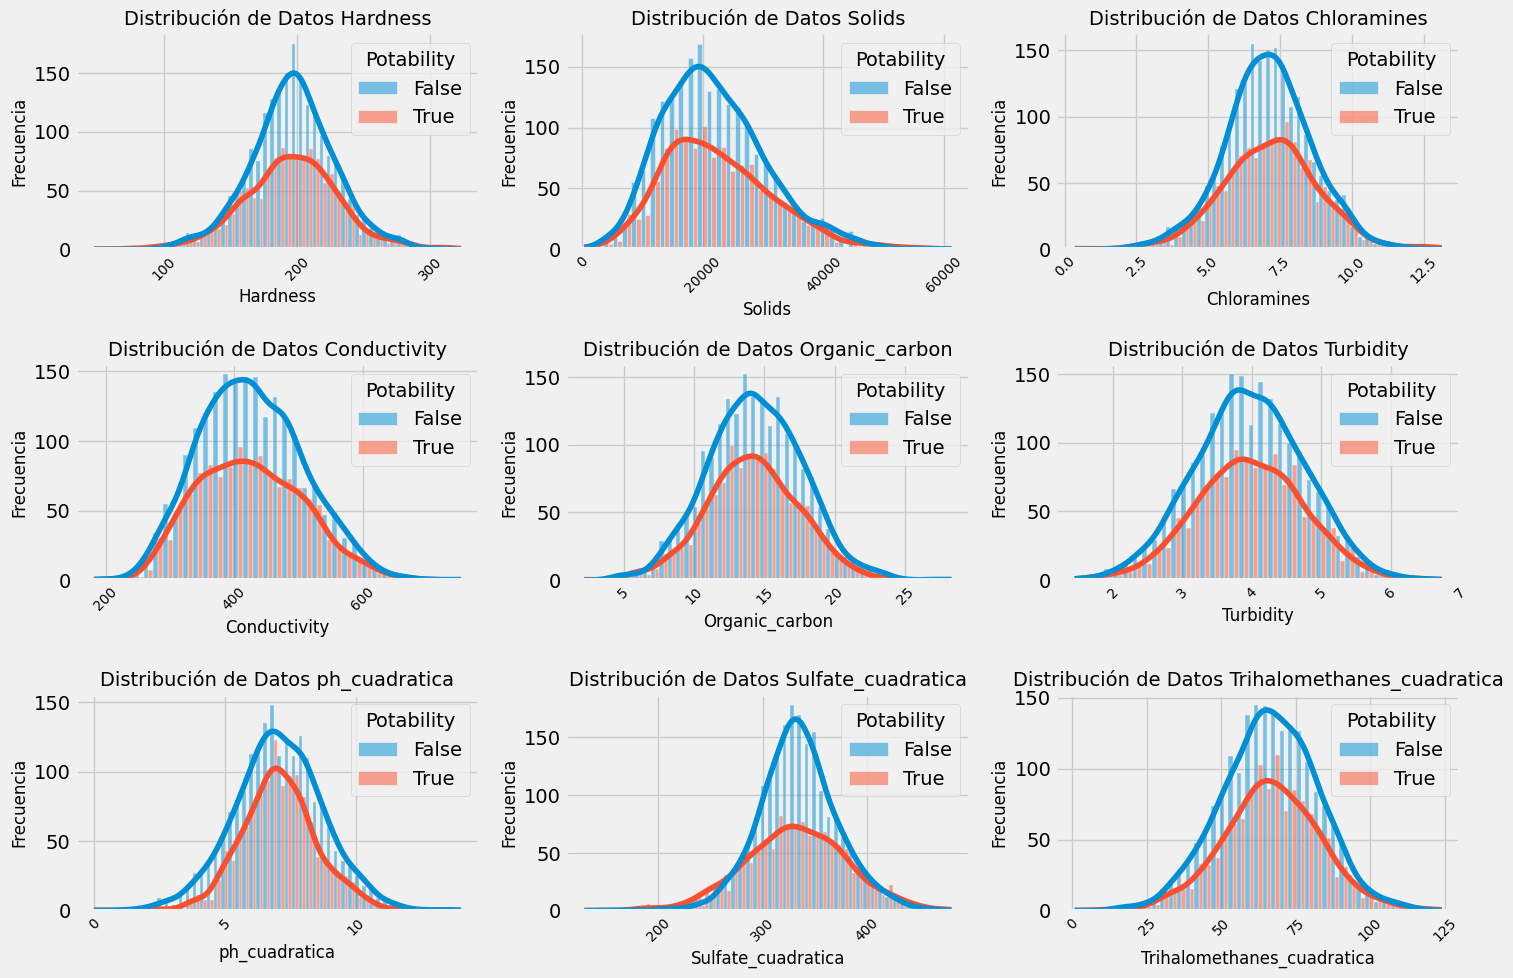

In [19]:
plt.figure(figsize = (15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)  # Ajustar el número de filas y columnas según el número de características
    sns.histplot(x = data[column], hue = data["Potability"], multiple = "dodge",kde = True)   # Agregar KDE y ajustar bins
    plt.title(f"Distribución de Datos {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)  # Agregar etiqueta del eje x
    plt.ylabel("Frecuencia", fontsize=12)  # Agregar etiqueta del eje y
    plt.tight_layout()
    plt.xticks(rotation = 45, fontsize=10) # Rotar etiquetas del eje x para mejor legibilidad
    plt.plot()

*Si el agua es potable o no, la tendencia de cada característica suele ser la misma.*

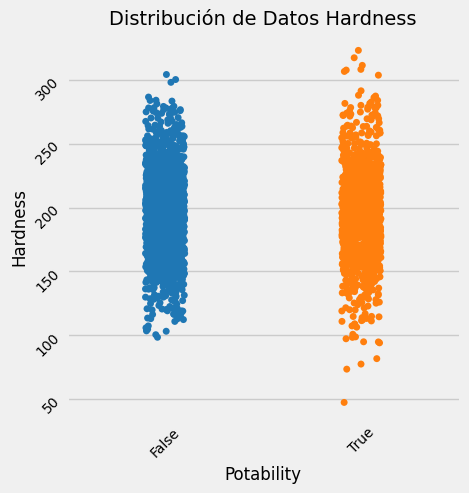

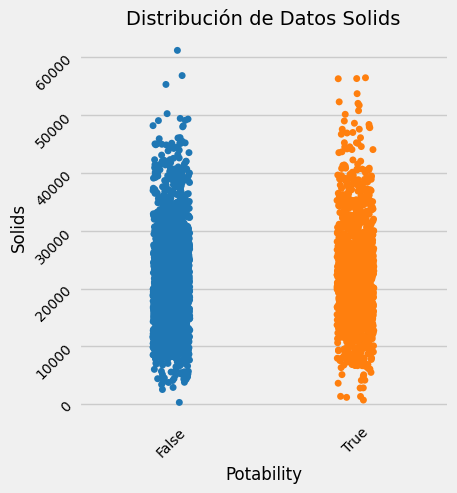

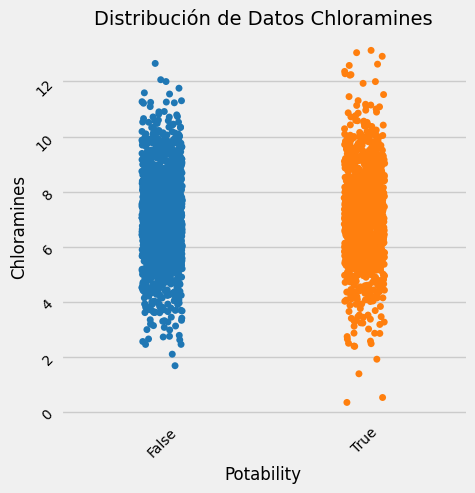

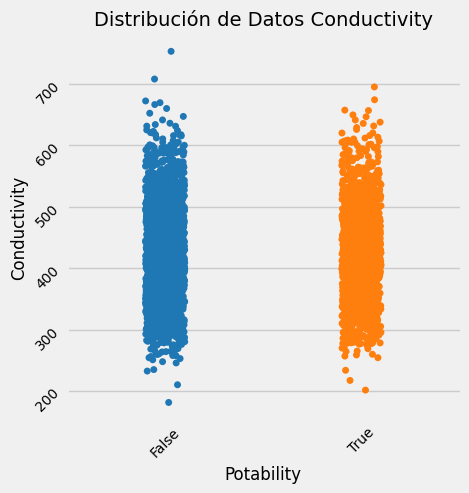

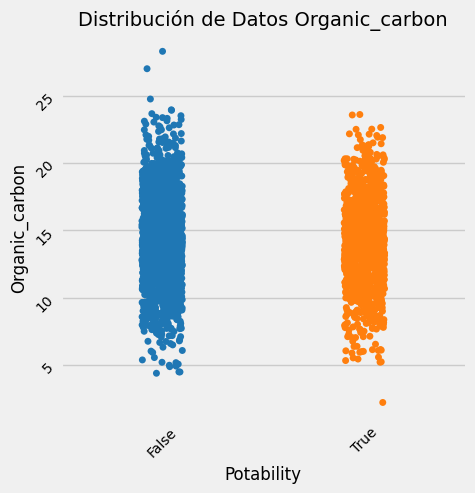

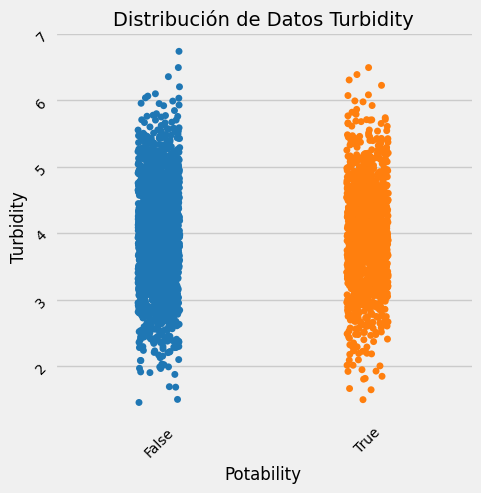

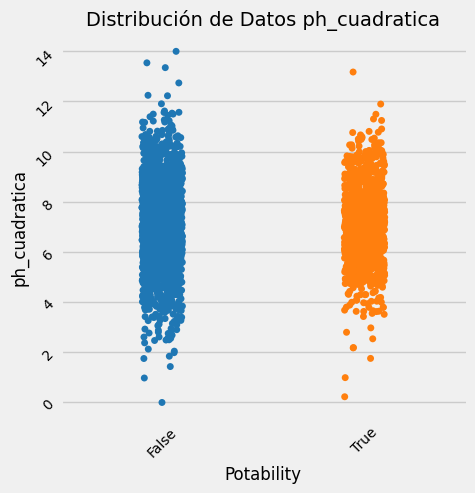

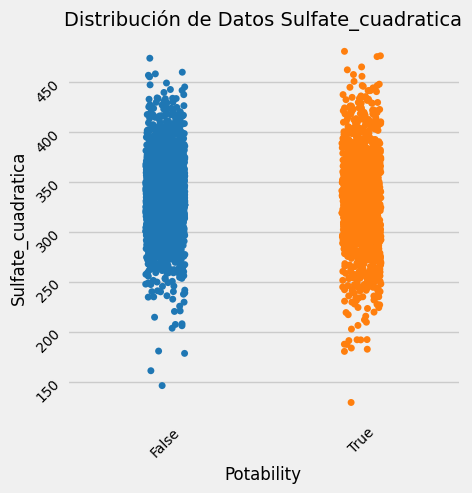

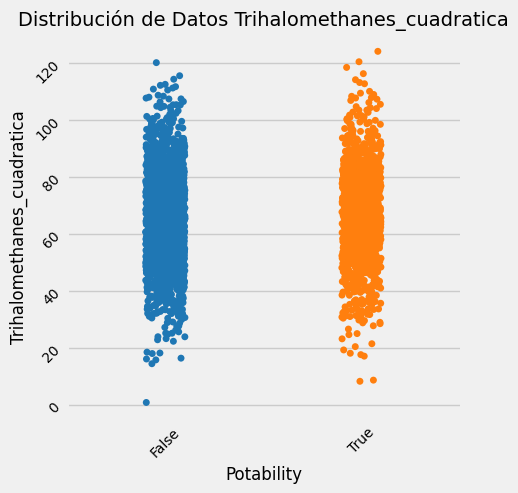

In [20]:
for column in data.columns:
    if column != 'Potability':
        sns.catplot(data=data, y=column, x='Potability', palette='tab10')
        plt.title(f"Distribución de Datos {column}", fontsize=14)
        plt.xlabel('Potability', fontsize=12)  # Agregar etiqueta del eje x
        plt.ylabel(column, fontsize=12)  # Agregar etiqueta del eje y
        plt.tight_layout()
        plt.xticks(rotation = 45, fontsize=10) # Rotar etiquetas del eje x para mejor legibilidad
        plt.yticks(rotation = 45, fontsize=10) # Rotar etiquetas del eje x para mejor legibilidad
    else:
        pass

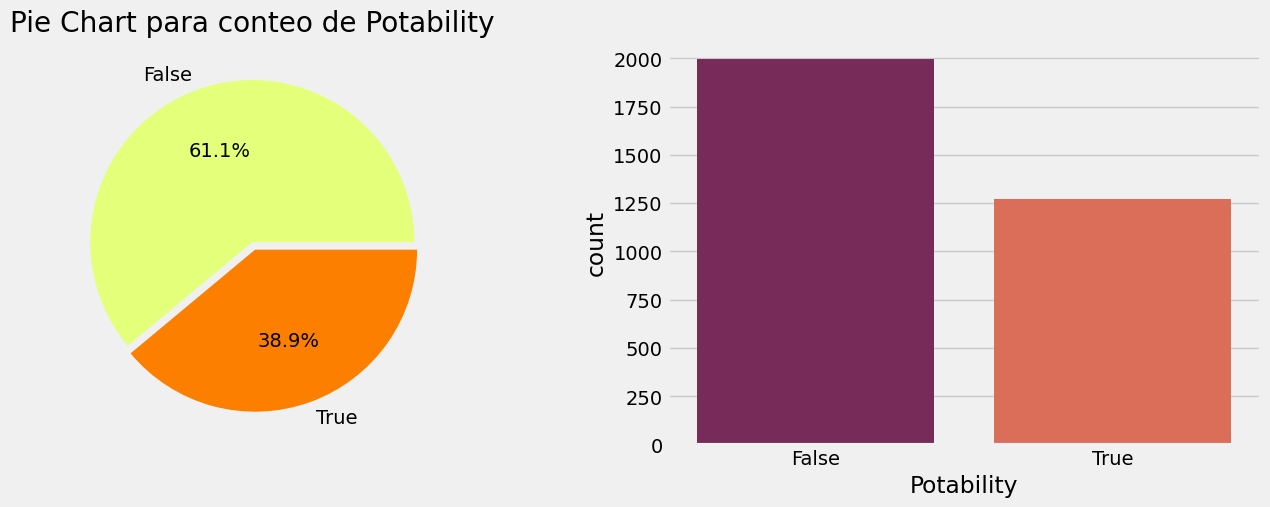

In [21]:
figure, axis = plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
data['Potability'].value_counts().plot.pie(ax=axis[0], autopct='%1.1f%%',title="Pie Chart para conteo de Potability", 
                                  legend=False, colormap='Wistia', startangle=0, explode=(0, 0.05), ylabel='')        # explode=(0.01, 0.05, 0.05, 0.05),
sns.countplot(data=data, x='Potability', palette="rocket")
plt.show();

## Revisión de la correlación

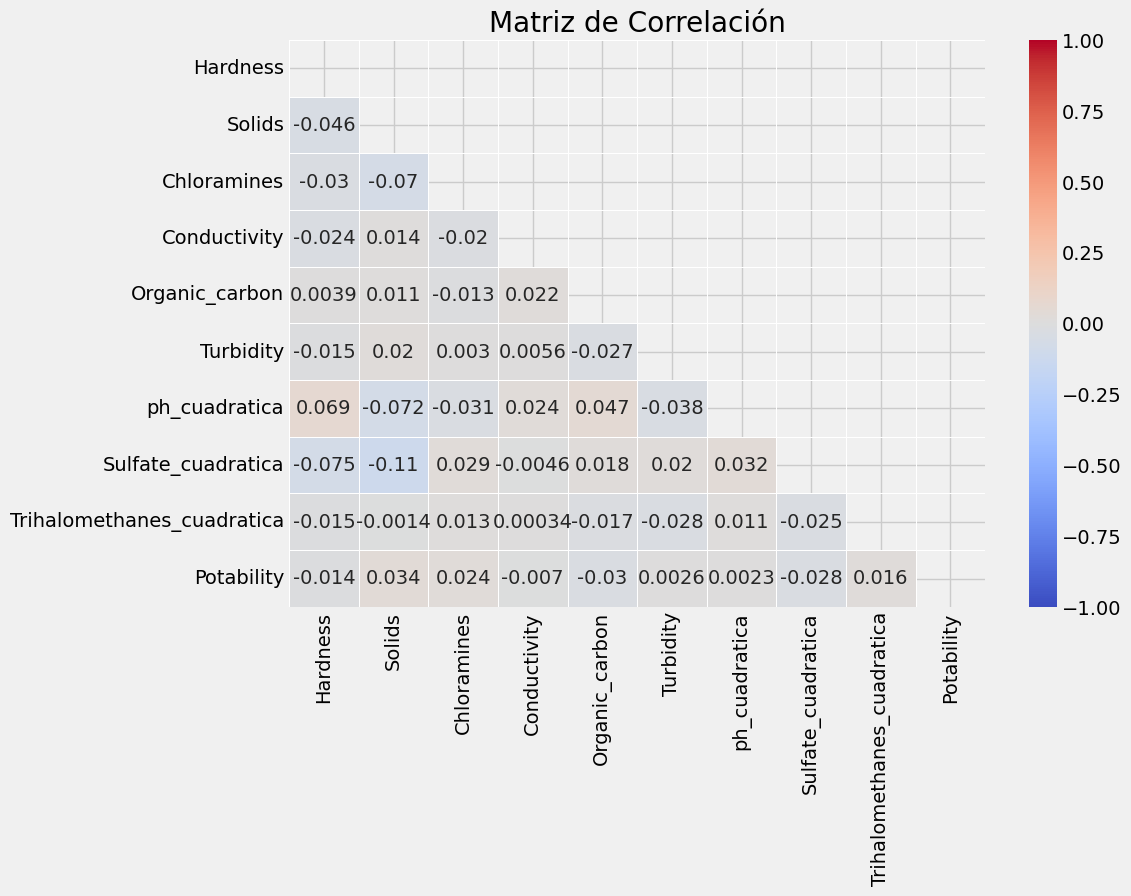

In [22]:
# Crear el heatmap
plt.figure(figsize=(10, 7))  # Ajustar tamaño de la figura
corr_matrix = data.corr()  # Calcular la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Crear una máscara para el triángulo superior
sns.heatmap(corr_matrix,
            annot=True,  # Mostrar los valores de correlación
            linewidths=0.5,  # Ancho de las líneas entre celdas
            cmap='coolwarm',  # Paleta de colores divergente
            vmin=-1, vmax=1,  # Límites del colormap
            mask=mask,  # Aplicar la máscara para ocultar el triángulo superior
            center=0  # Centrar la paleta de colores en 0
           )
plt.title('Matriz de Correlación')
plt.show()

# Análisis de la matriz de correlación

* **Correlaciones débiles:** La mayoría de las variables presentan correlaciones débiles, lo que indica que no existe una relación lineal fuerte entre ellas.
* **Correlaciones moderadas:** Algunas variables, como 'Hardness' y 'Solids', muestran una correlación positiva moderada, sugiriendo una relación directa.
* **Posibles relaciones inversas:** La potabilidad parece estar relacionada negativamente con variables como 'Sulfate_cuadratica' y 'ph_cuadratica'.

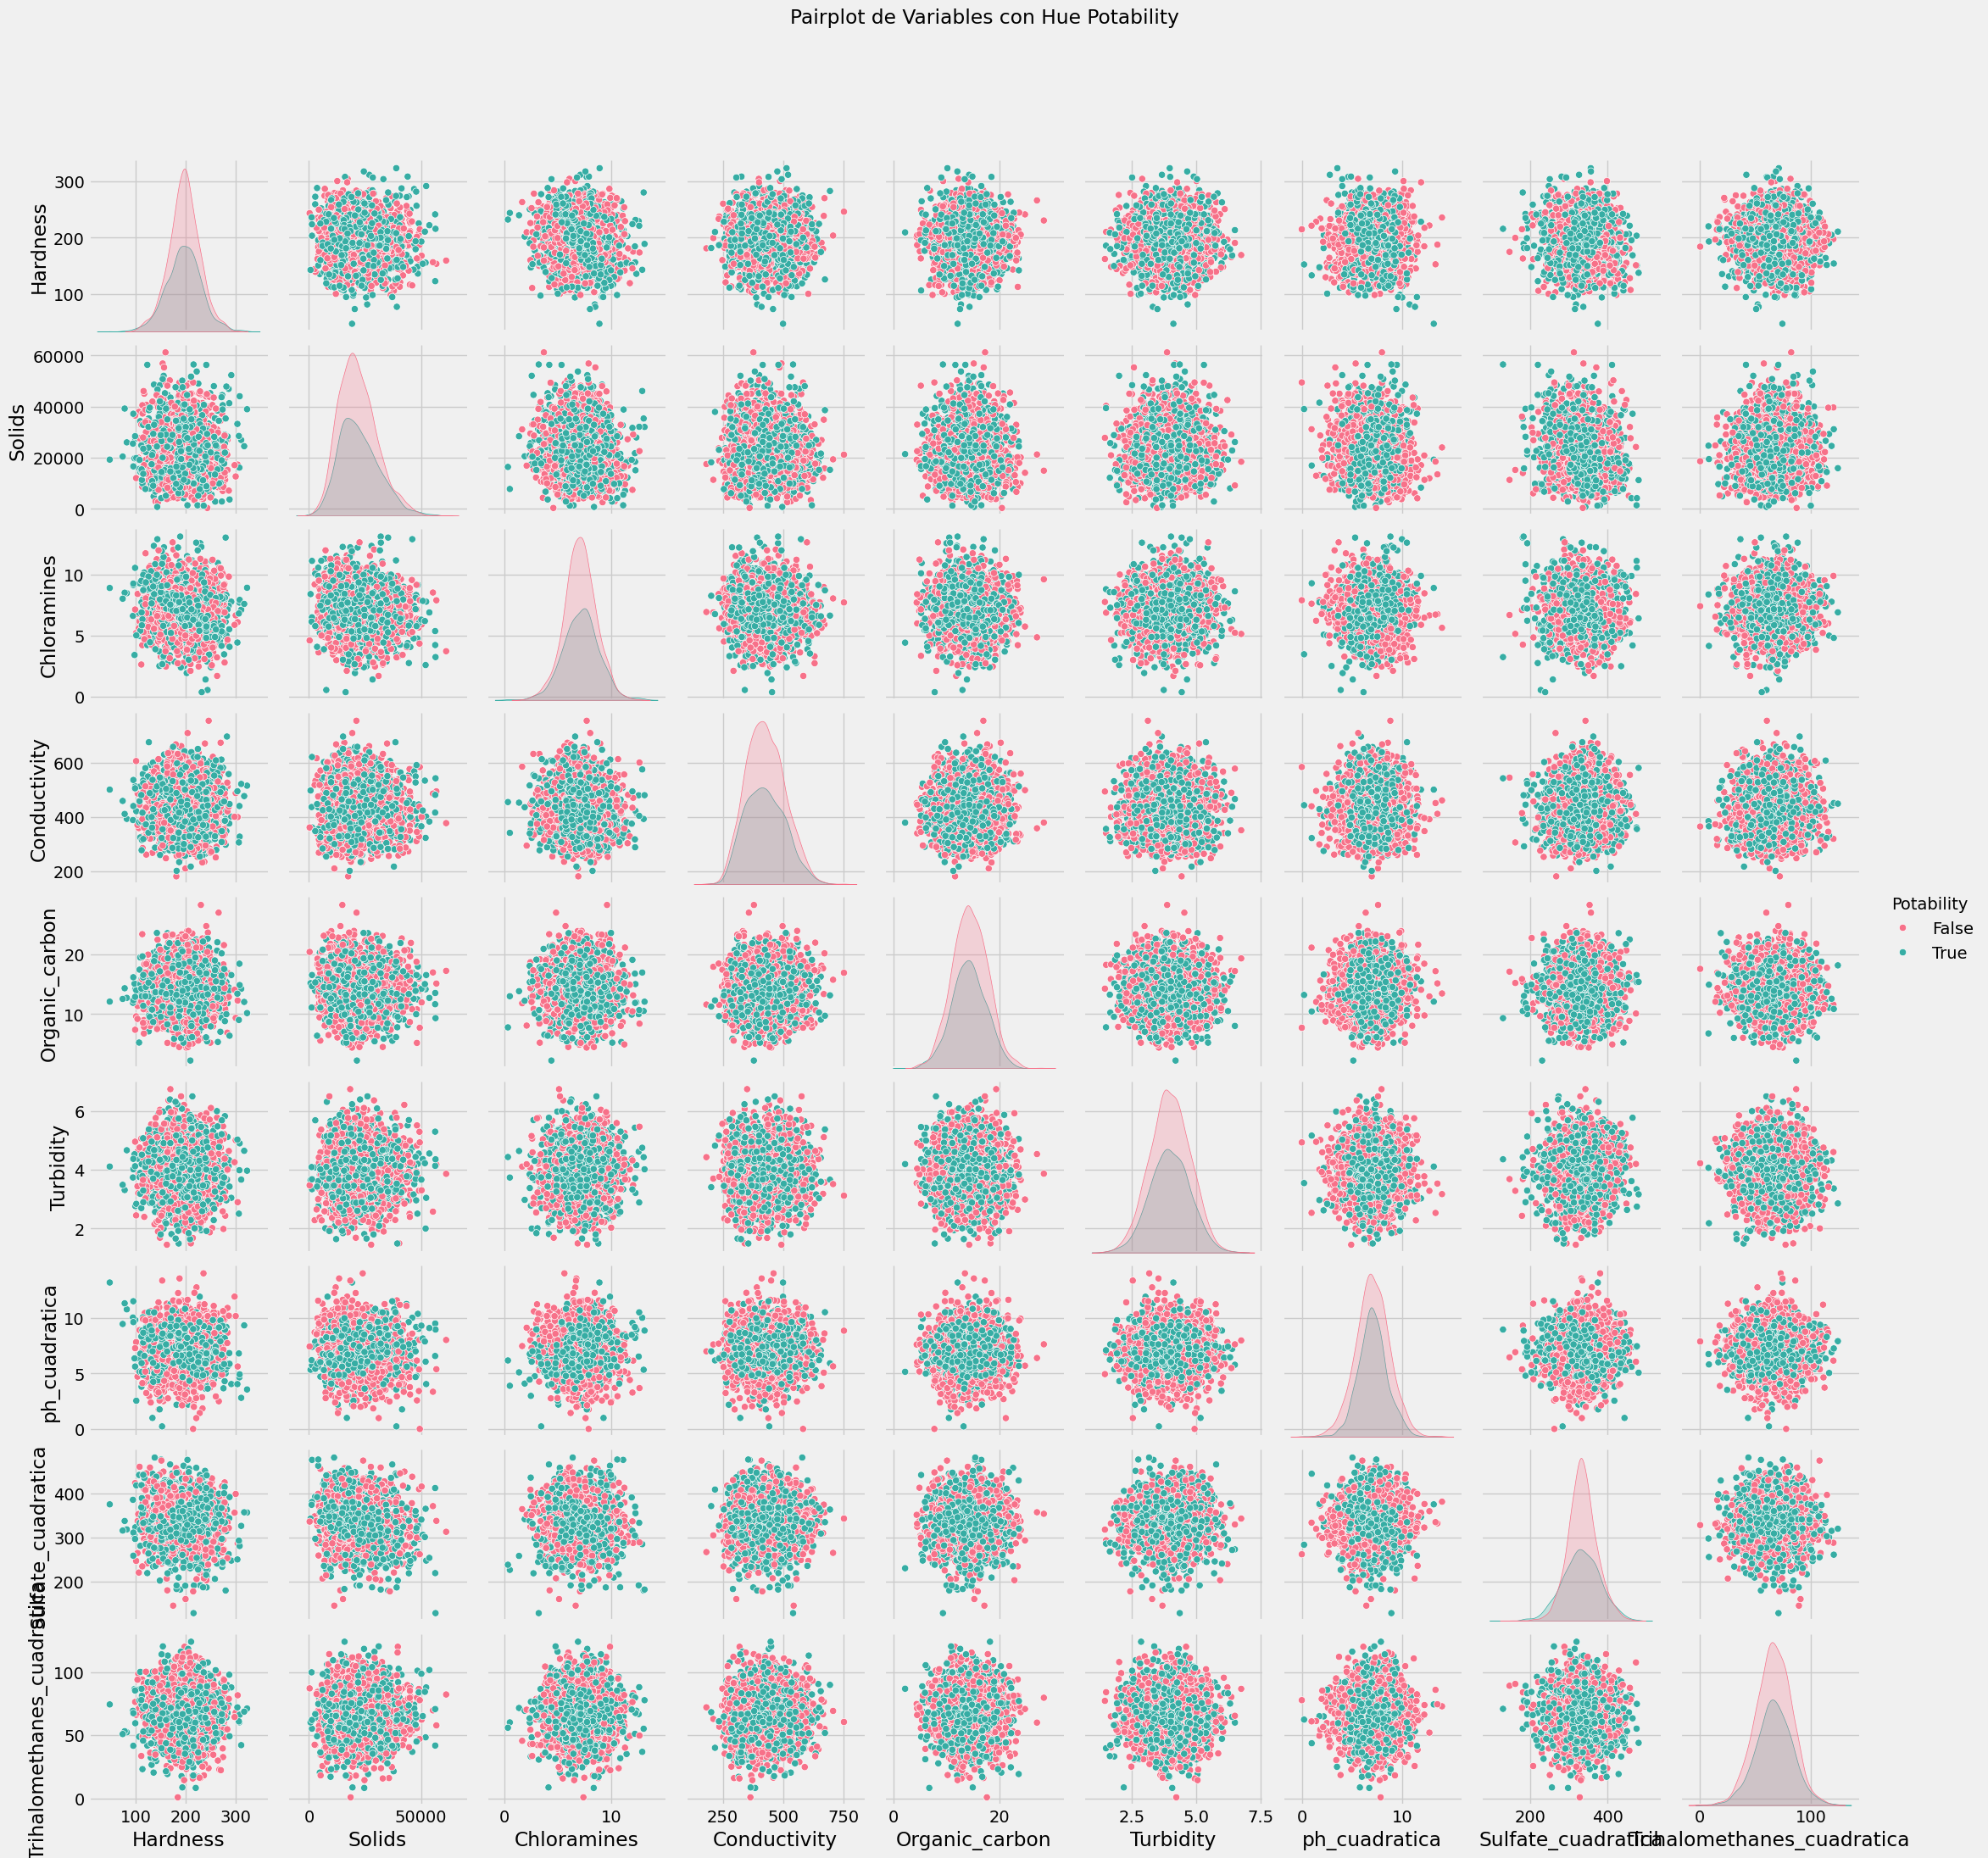

In [23]:
# Crear el pairplot
sns.pairplot(data, hue='Potability', palette='husl', diag_kind='kde')

# Ajustar el tamaño de la figura (opcional)
plt.subplots_adjust(top=0.9)

# Agregar título (opcional)
plt.suptitle('Pairplot de Variables con Hue Potability')

plt.show()

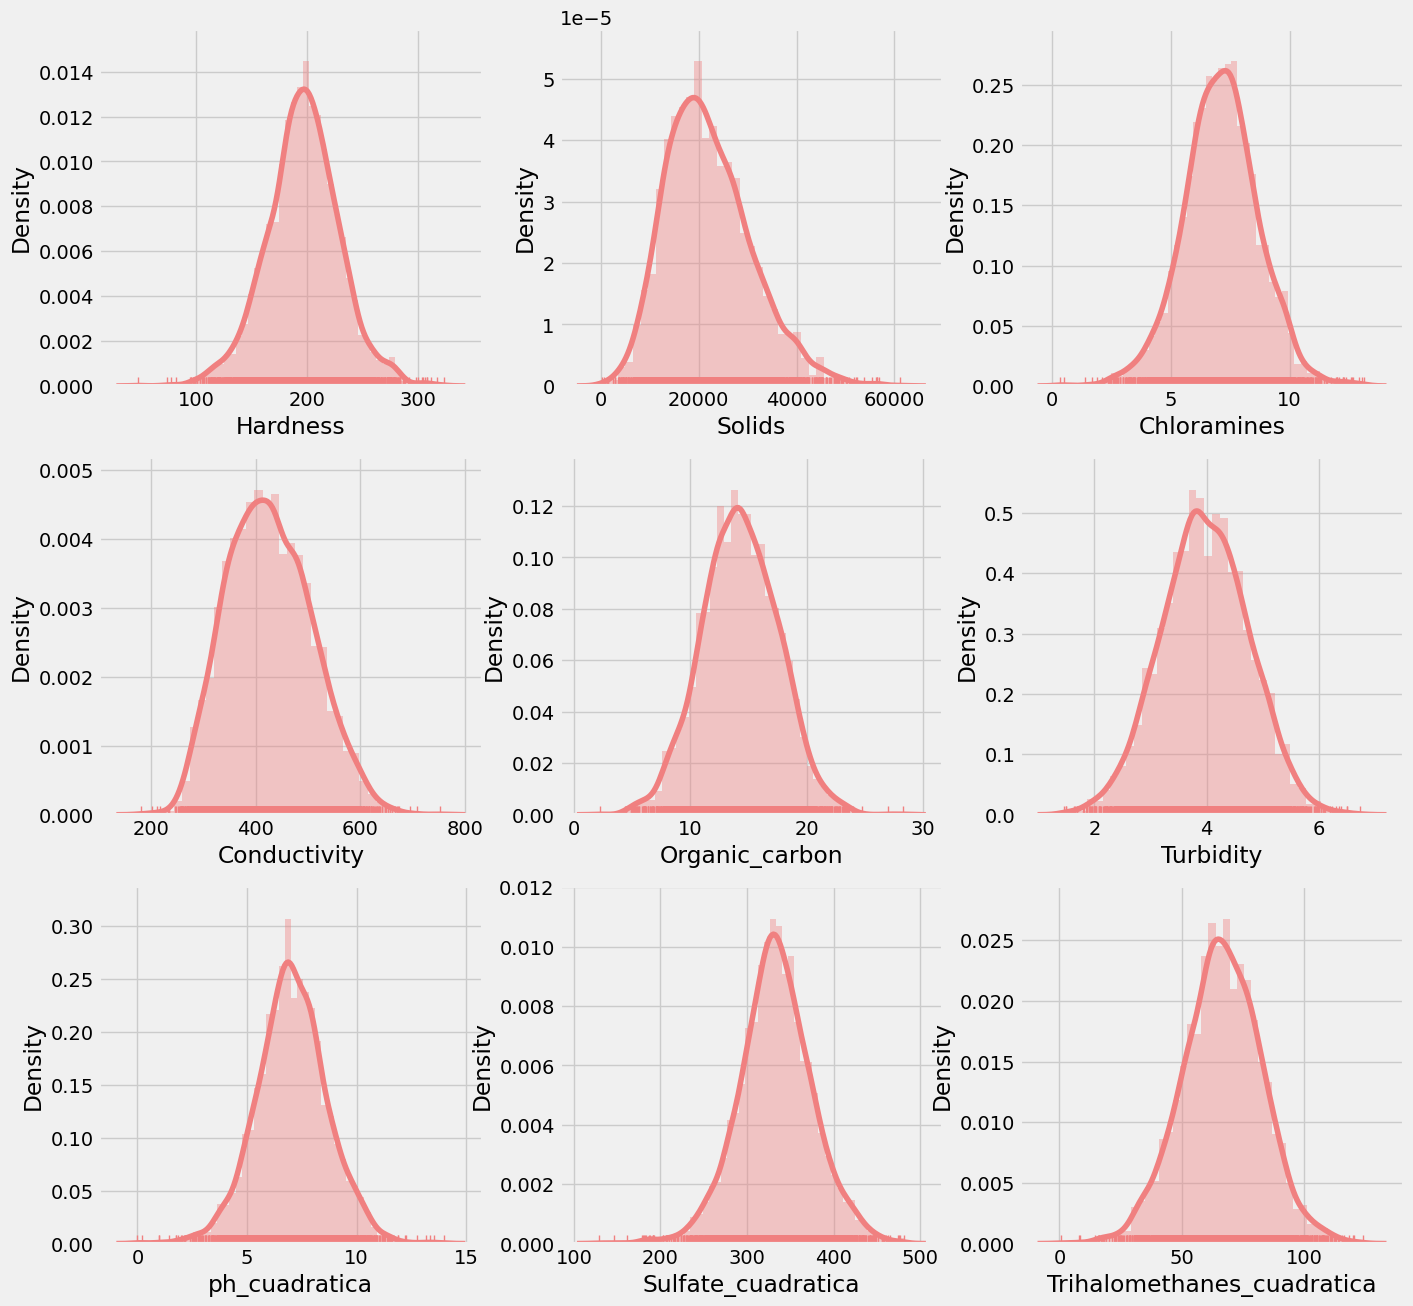

In [24]:
def graficar_distribuciones(data):
    """
    Crea un conjunto de gráficos de distribución para visualizar la distribución 
    de cada columna numérica en un DataFrame.

    Args:
        data (pd.DataFrame): El DataFrame que contiene los datos.

    Returns:
        None: Muestra los gráficos directamente.
    """
    # Calcula el número total de columnas en el DataFrame
    num_columnas = len(data.columns)

    # Determina el número de filas necesarias para la cuadrícula de gráficos
    num_filas = int(np.ceil(num_columnas / 3))

    # Crea una figura con una cuadrícula de subplots
    fig, axes = plt.subplots(nrows=num_filas, ncols=3, figsize=(15, 15))
 
    # Itera sobre cada columna del DataFrame
    for i, columna in enumerate(data.columns):
        # Calcula la posición del subplot en la cuadrícula
        fila = i // 3
        col = i % 3

        # Crea un gráfico de distribución en el subplot correspondiente
        sns.distplot(
            data[columna],  # Datos de la columna actual
            color="lightcoral",  # Color de la distribución
            ax=axes[fila, col],  # Eje donde se dibujará el gráfico
            kde=True,  # Mostrar la curva de densidad de kernel
            rug=True  # Mostrar un "rug plot" para visualizar los puntos de datos
        )
    # Muestra la figura con todos los gráficos
    plt.show()
    
# Aplicación:
# Elimina la columna 'Potability' del DataFrame original
datos_a_graficar = data.drop(['Potability'], axis=1)
# Llama a la función para crear los gráficos
graficar_distribuciones(datos_a_graficar)

# Preprocesamiento de datos

In [25]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

# # # Dado que los datos no tienen una forma uniforme, escalamos los datos utilizando un escalador estándar.
# scaler = StandardScaler()
# X_scaler=scaler.fit_transform(X)

# Modelado

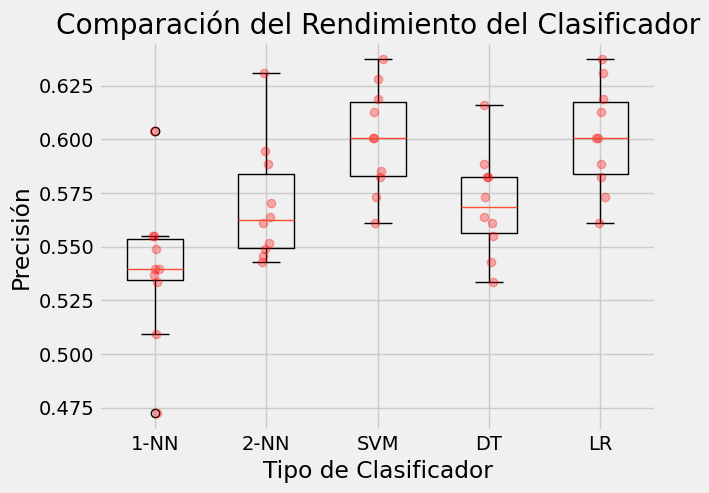

In [26]:
# Proporción del conjunto de datos para usar en pruebas
PRC = 0.1

# Matriz para almacenar la precisión de cada clasificador en cada iteración
acc_r = np.zeros((10, 5))  # 10 iteraciones, 4 clasificadores

# Repetir el experimento 10 veces para obtener una distribución de métricas de rendimiento
for i in range(10):
    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)

    # Inicializar clasificadores con configuraciones específicas
    nn1 = KNeighborsClassifier(n_neighbors=1)  # KNN con 1 vecino cercano
    nn2 = KNeighborsClassifier(n_neighbors=2)  # KNN con 2 vecinos cercanos
    nn3 = KNeighborsClassifier(n_neighbors=3)  # KNN con 3 vecinos cercanos
    svc = SVC()  # Máquina de Soporte Vectorial
    dt = DecisionTreeClassifier()  # Árbol de Decisión
    lr = LogisticRegression()
    

    # Entrenar cada clasificador con el conjunto de entrenamiento
    nn1.fit(X_train, y_train)
    nn2.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    # Predecir las etiquetas para el conjunto de prueba usando cada clasificador entrenado
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn2 = nn2.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    yhat_lr = lr.predict(X_test)

    # Calcular y almacenar la precisión de cada clasificador
    acc_r[i][0] = accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = accuracy_score(yhat_nn2, y_test)
    acc_r[i][2] = accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = accuracy_score(yhat_dt, y_test)
    acc_r[i][4] = accuracy_score(yhat_lr, y_test)

# Diagrama de cajas para visualizar la precisión de cada clasificador
plt.boxplot(acc_r)

# Superponer los resultados de precisión individuales como puntos rojos para comparación visual
for i in range(5):
    desplazamiento_x = (i + 1) * np.ones(acc_r[:, i].shape) + (np.random.rand(10) - 0.5) * 0.1
    plt.plot(desplazamiento_x, acc_r[:, i], 'ro', alpha=0.3)

# Etiquetas para el gráfico
ax = plt.gca()
ax.set_xticklabels(['1-NN', '2-NN', 'SVM', 'DT', 'LR'])

plt.xlabel('Tipo de Clasificador')
plt.ylabel('Precisión')
plt.title('Comparación del Rendimiento del Clasificador')

# Mostrar el gráfico
plt.show()

In [27]:
# Seleccionar columnas numéricas y categóricas
columnas_numericas = X.select_dtypes(include=np.number).columns
columnas_categoricas = X.select_dtypes(include=['object']).columns

# Definir pasos de preprocesamiento
procesamiento_numerico = Pipeline([("imputador", SimpleImputer(strategy='mean')), ("escalador", StandardScaler())])
procesamiento_categorico = Pipeline([("imputador", SimpleImputer(strategy='most_frequent')), ("codificador", OneHotEncoder(sparse_output=False, drop='first'))])

# Crear transformador de columnas que procesará las características numéricas y categóricas por separado
preprocess = ColumnTransformer(
    transformers=[
        ("preprocesamiento_categorico", procesamiento_categorico, columnas_categoricas),
        ("preprocesamiento_numerico", procesamiento_numerico, columnas_numericas)
    ]
)

In [28]:
# Definir pipelines para cada clasificador
svc_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('svc', SVC())
])

knn_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('knn', KNeighborsClassifier())
])

tree_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('tree', DecisionTreeClassifier())
])
random_forest = Pipeline([
    ('preprocess', preprocess),
    ('randomforest', RandomForestClassifier())
])
Logistic_regression = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

In [29]:
# Parámetro de cuadrícula para GridSearchCV
param_grid = [
    {
        'svc__C': [0.1, 1, 10]  # Valores para el parámetro de regularización C del SVC
    },
    {
        'knn__n_neighbors': [3, 5, 7]  # Valores para el número de vecinos del KNN
    },
    {
        'tree__max_depth': [2, 3, 4, 6, 8]  # Valores para la profundidad máxima del árbol de decisión
    },
    {
        'randomforest__max_depth': [2, 3, 4, 6, 8]  # Valores para la profundidad máxima del bosque aleatorio
    },
    {
        'logistic__C': [0.1, 1, 10]  # Valores para el parámetro de regularización C de la Regresión Logística
    }
]

In [30]:
# Define custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}

In [31]:
# Lista de pipelines y nombres de modelos
pipelines = [svc_pipeline, knn_pipeline, tree_pipeline, random_forest, Logistic_regression]
pipelines_names = ['SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']

In [64]:
def plot_confusion_matrix_train(model_name, pipeline, X_train, y_train):
  """
  Función para generar y guardar la matriz de confusión de un modelo.

  Args:
      model_name (str): Nombre del modelo para el título del gráfico.
      pipeline (sklearn.pipeline.Pipeline): Pipeline del modelo.
      X_train (pd.DataFrame): Datos de entrenamiento.
      y_train (pd.Series): Etiquetas de clase de entrenamiento.
  """
  y_pred = pipeline.predict(X_train)
  conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)

  plt.figure(figsize=(15, 8))
  sns.set(font_scale=1.4)  # Ajuste del tamaño de las etiquetas

  # Anotar con valores absolutos y porcentajes
  sns.heatmap(conf_matrix, annot=True, 
              fmt=".2f",  # Formato con dos decimales
              annot_kws={"size": 16}, 
              cbar=False, 
              linewidths=1)

  plt.title(f"Matriz de Confusión - {model_name} (Entrenamiento)")
  plt.xlabel("Clase Predicha")
  plt.ylabel("Clase Real")
  plt.savefig(f'conf_{model_name}_train.png')
  plt.show()

def plot_confusion_matrix_test(model_name, pipeline, X_test, y_test):
    """
    Función para generar y guardar la matriz de confusión de un modelo en el conjunto de test.

    Args:
        model_name (str): Nombre del modelo para el título del gráfico.
        pipeline (sklearn.pipeline.Pipeline): Pipeline del modelo.
        X_test (pd.DataFrame): Datos de test.
        y_test (pd.Series): Etiquetas de clase de test.
    """
    y_pred = pipeline.predict(X_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    plt.figure(figsize=(15, 8))
    sns.set(font_scale=1.4)  # Ajuste del tamaño de las etiquetas

    # Anotar con valores absolutos y porcentajes
    sns.heatmap(conf_matrix, annot=True, 
                fmt=".2f",  # Formato con dos decimales
                annot_kws={"size": 16}, 
                cbar=False, 
                linewidths=1)

    plt.title(f"Matriz de Confusión - {model_name} (Test)")
    plt.xlabel("Clase Predicha")
    plt.ylabel("Clase Real")
    plt.savefig(f'conf_{model_name}_test.png')
    plt.show()

def plot_model_comparison(results_df, figsize=(14, 6),palette = 'viridis'):
  """
  Función para generar un gráfico de barras horizontales comparando los resultados de diferentes modelos.

  Args:
      results_df (pd.DataFrame): DataFrame con los resultados de la búsqueda en cuadrícula.
      figsize (tuple, optional): Tamaño de la figura del gráfico. Defaults to (14, 6).
  """
  fig, ax = plt.subplots(figsize=figsize)
  results_df.plot.barh(ax=ax)

  # Aplicar la paleta de colores
  sns.set_palette(palette)

  # Personalizar la leyenda
  ax.legend(
      ncol=len(results_df.columns),  # Ajuste del número de columnas
      bbox_to_anchor=(0, 1),          # Posición de la leyenda
      loc='lower left',               # Ubicación (abajo izquierda)
      prop={'size': 10}               # Tamaño de la fuente de la leyenda
  )

  # Ajuste del layout
  plt.tight_layout(pad=3.0, w_pad=1.0, h_pad=1.0)  # Personalizar los márgenes

  plt.show()

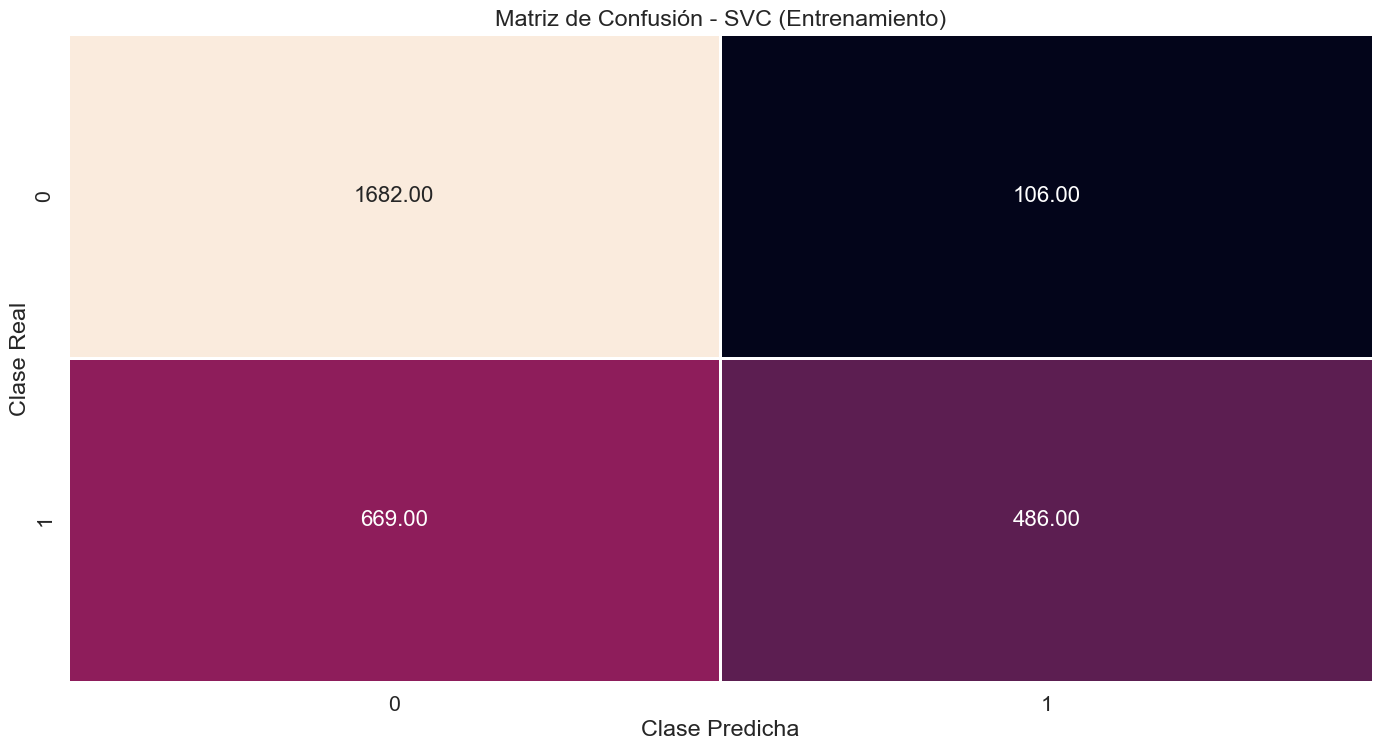

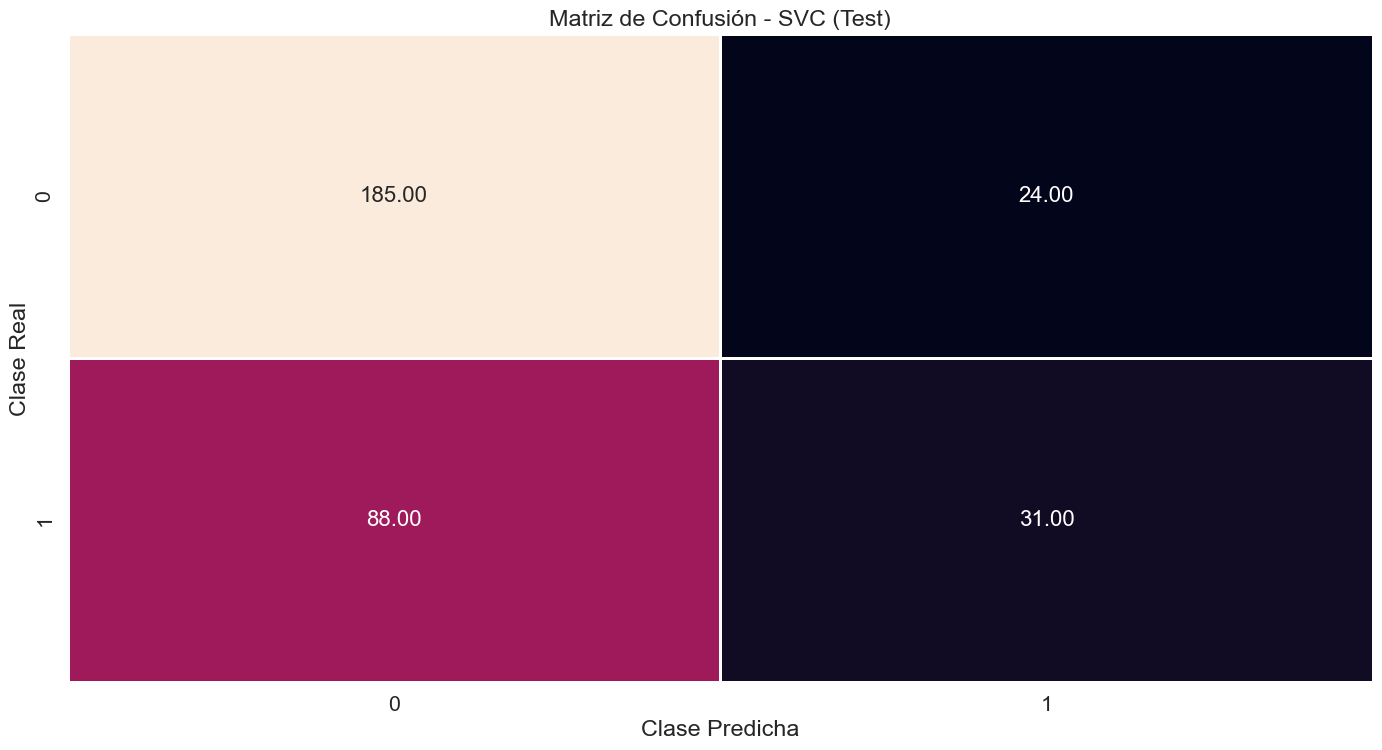

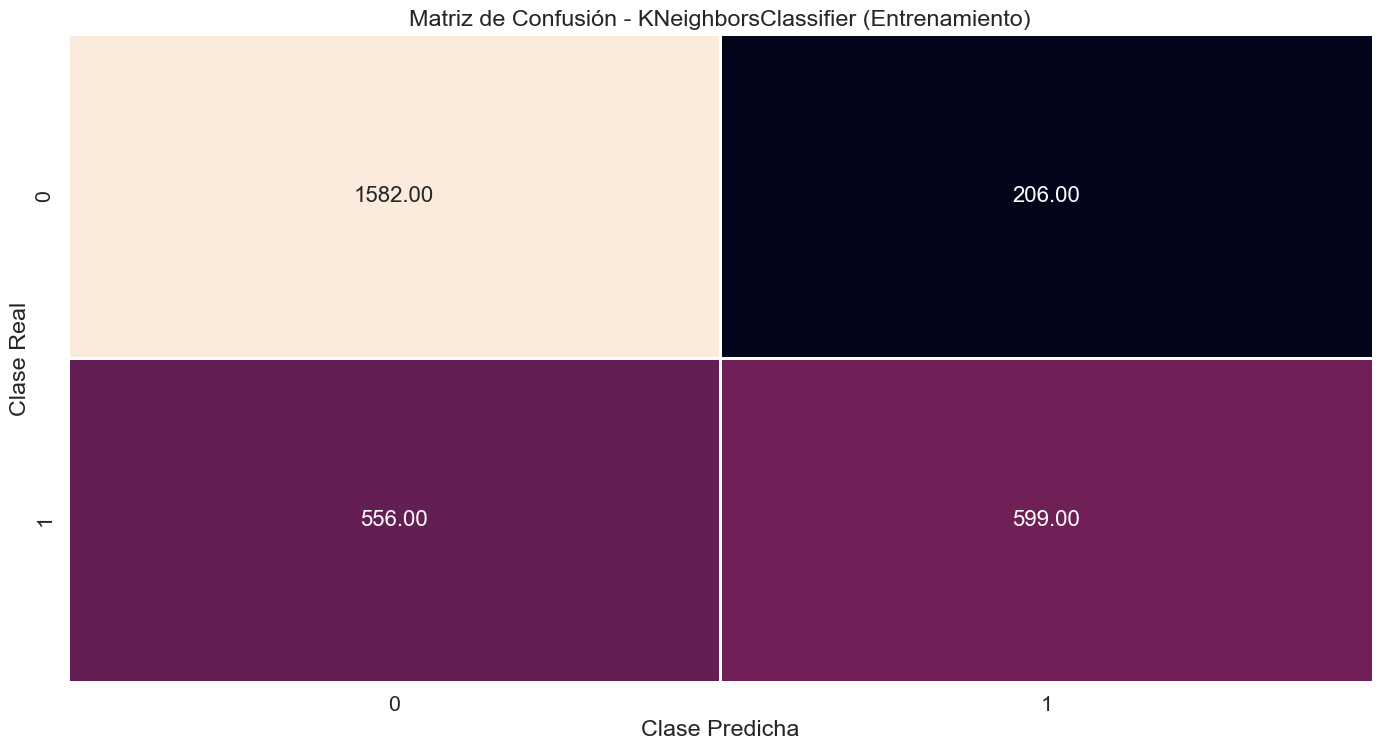

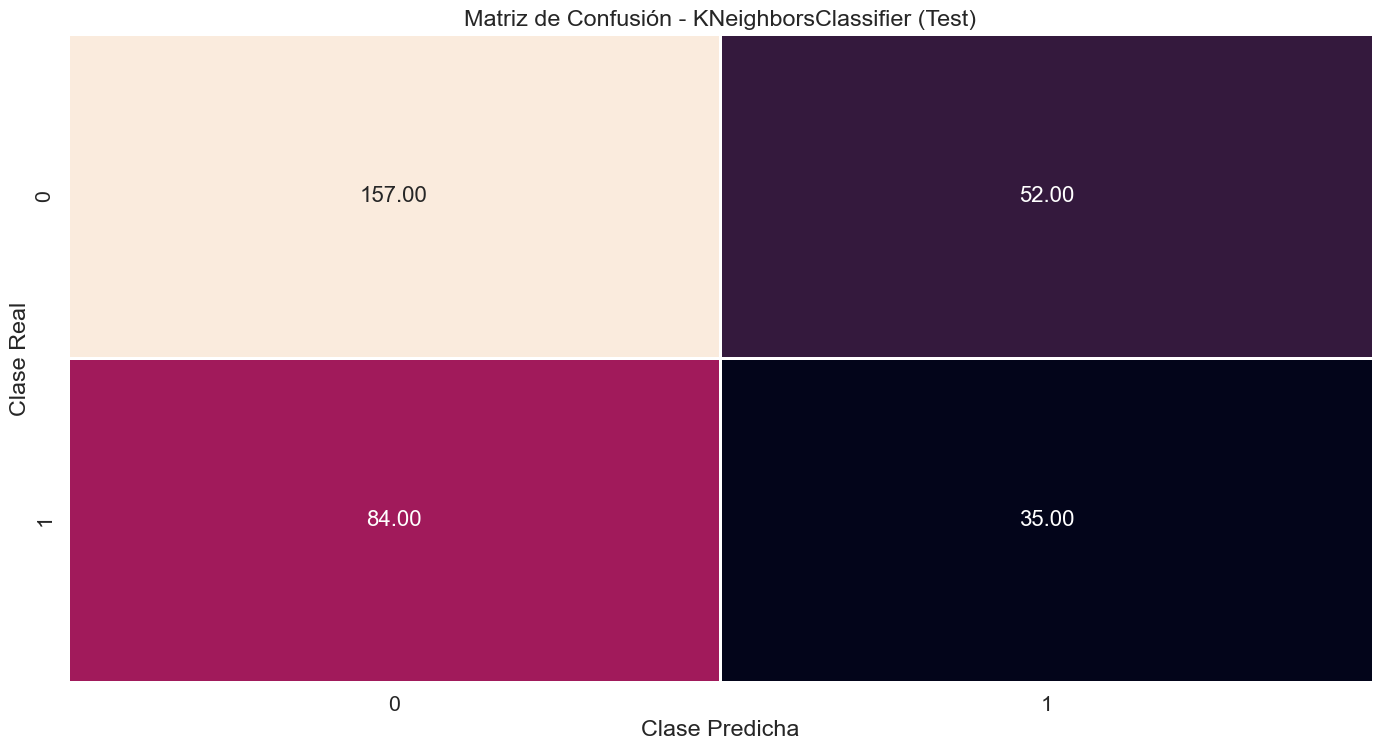

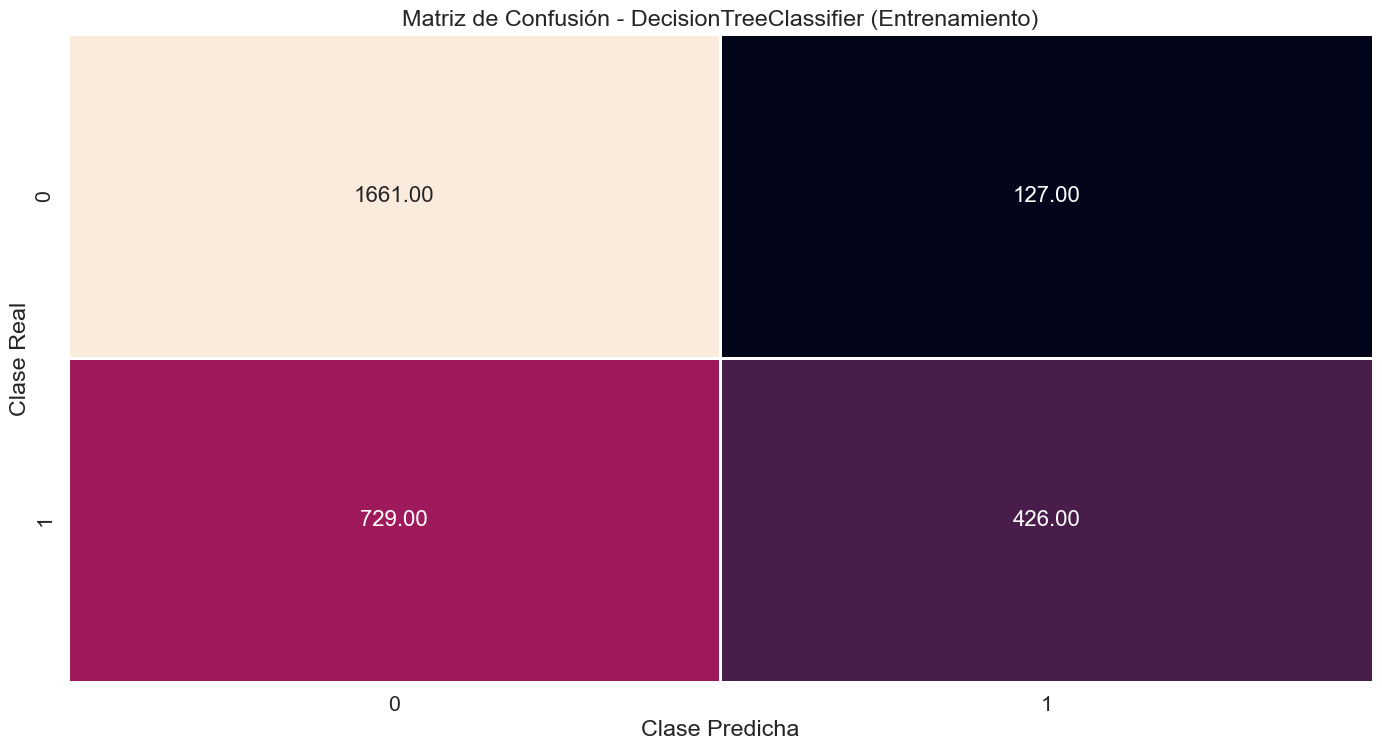

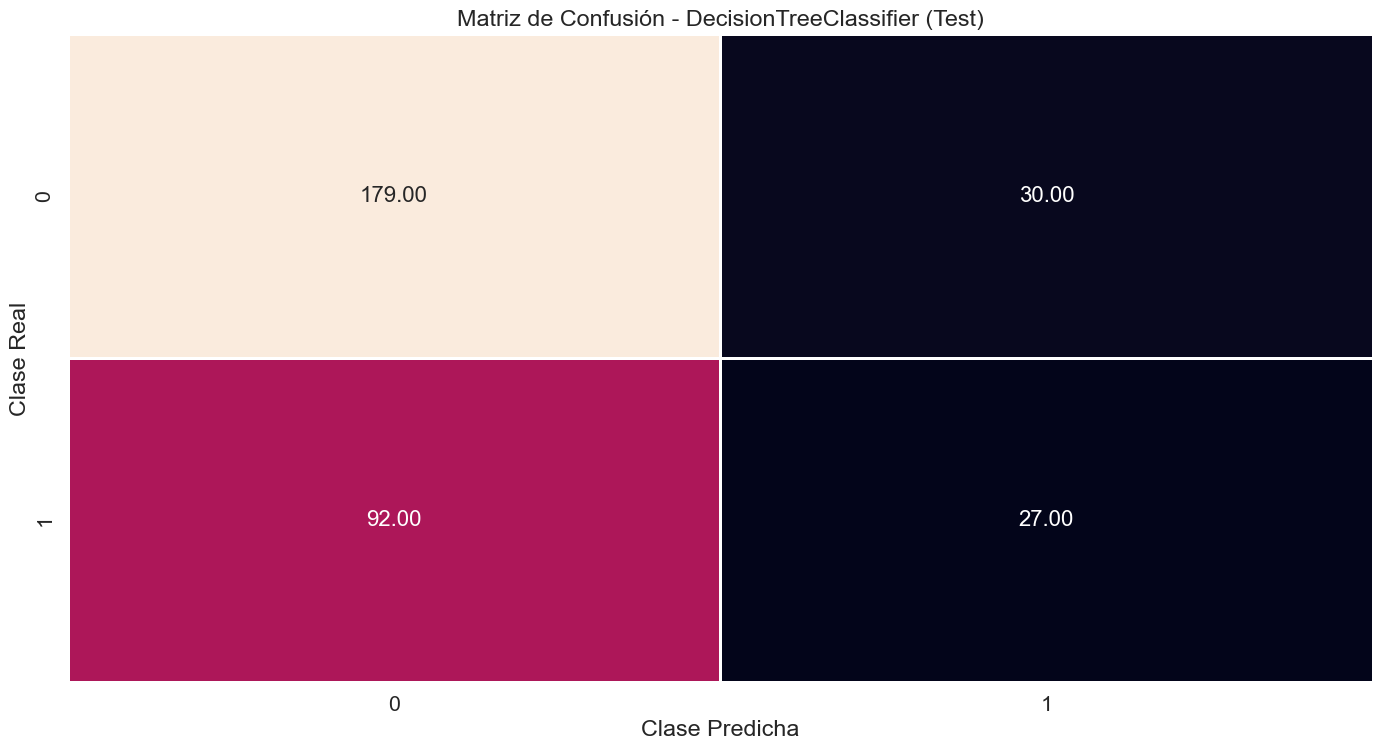

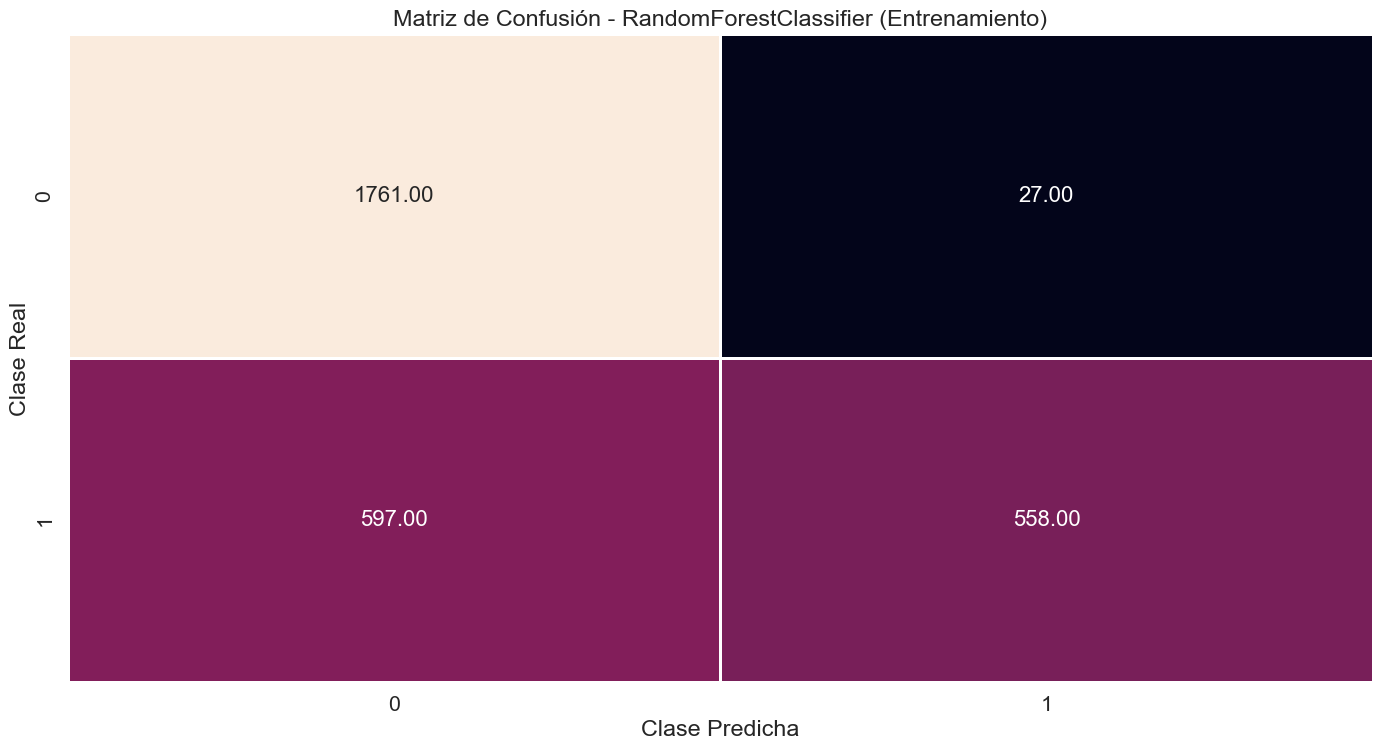

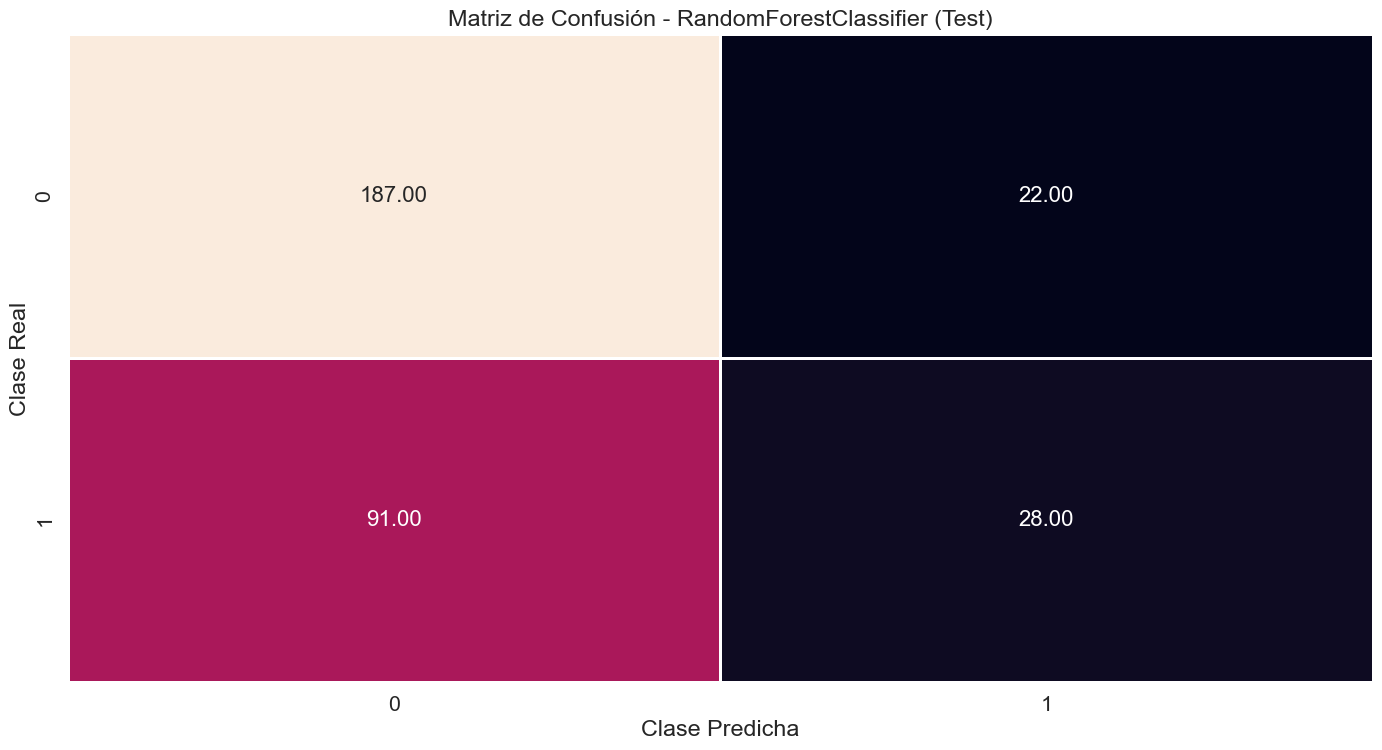

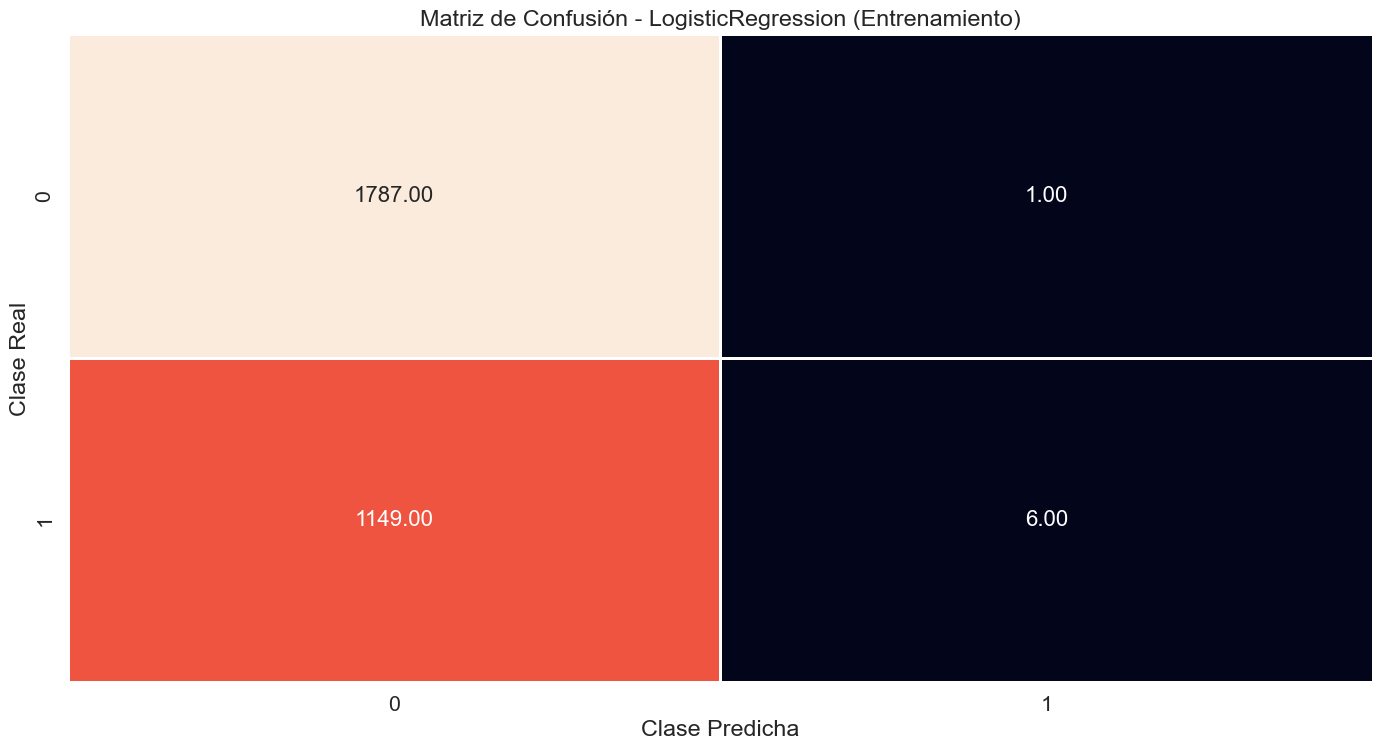

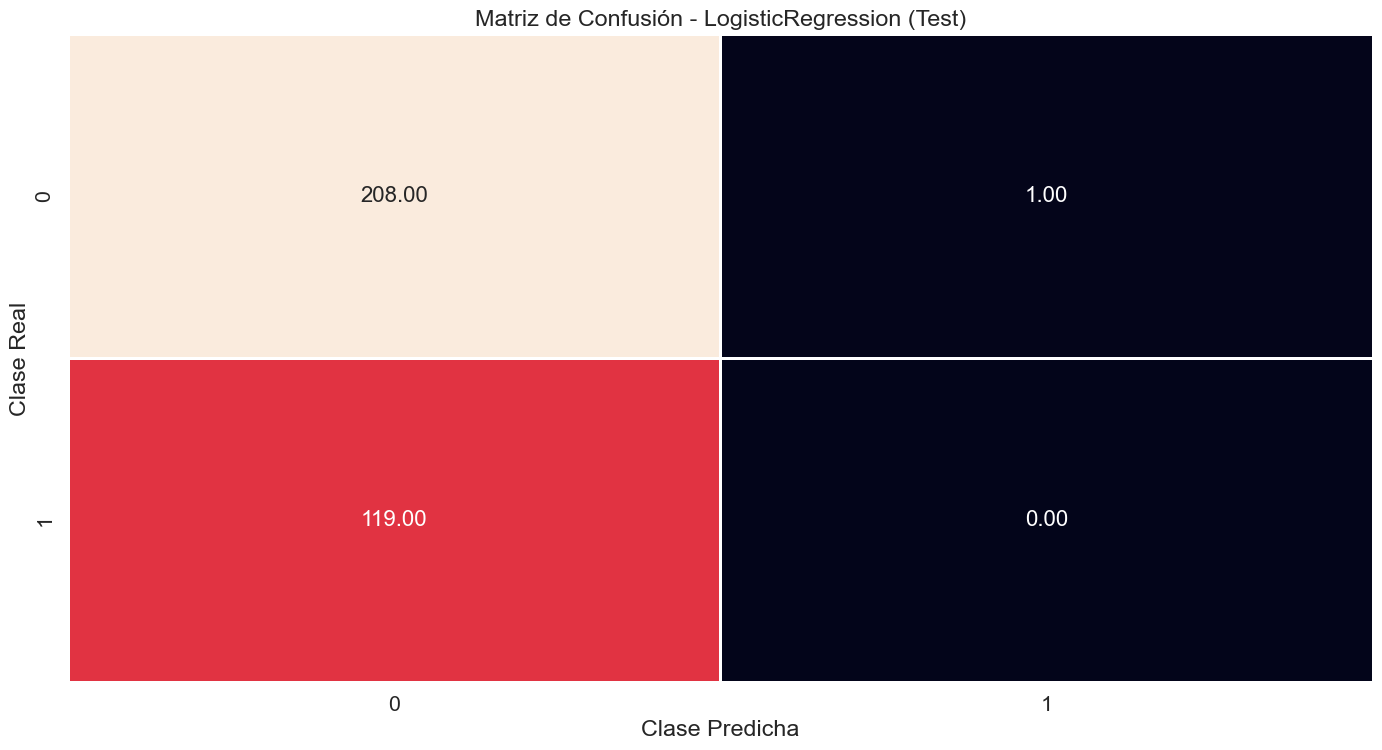

In [67]:
# Lista para almacenar resultados
results_list = [] # Se usa "results_list" para ser más descriptivo en español

# Realizar GridSearchCV para cada pipeline
for pipeline, params, name in zip(pipelines, param_grid, pipelines_names):
    grid_search = GridSearchCV(pipeline, params, cv=8, scoring=scoring, refit='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)
 
    # Extraer resultados de validación cruzada para los mejores parámetros
    # - índice del mejor resultado
    best_index = grid_search.best_index_
    results = grid_search.cv_results_  # Se usa "results para diferenciar de resultados finales
    
    # Crear un diccionario con los resultados del modelo actual
    results_list.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Best Accuracy': results['mean_test_accuracy'][best_index],
        'Best Precision': results['mean_test_precision'][best_index],
        'Best Recall': results['mean_test_recall'][best_index],
        'Best F1': results['mean_test_f1'][best_index]
    })

    plot_confusion_matrix_train(name, grid_search.best_estimator_, X_train, y_train)  # Usar el mejor estimador
    plot_confusion_matrix_test(name, grid_search.best_estimator_, X_test, y_test)  # Usar el mejor estimador

# Añadir el resultado del modelo actual a la lista final
results_df = pd.DataFrame(results_list)

# Establecer la columna 'Modelo' como índice
results_df.set_index('Model', inplace=True)


Best Parameters  Best Accuracy  \
Model                                                                   
SVC                                      {'svc__C': 1}       0.671086   
KNeighborsClassifier           {'knn__n_neighbors': 7}       0.638130   
DecisionTreeClassifier          {'tree__max_depth': 6}       0.641528   
RandomForestClassifier  {'randomforest__max_depth': 8}       0.658520   
LogisticRegression                  {'logistic__C': 1}       0.609243   

                        Best Precision  Best Recall   Best F1  
Model                                                          
SVC                           0.672100     0.671086  0.634466  
KNeighborsClassifier          0.623819     0.638130  0.616894  
DecisionTreeClassifier        0.630039     0.641528  0.609876  
RandomForestClassifier        0.658652     0.658520  0.613386  
LogisticRegression            0.590705     0.609243  0.463681

None


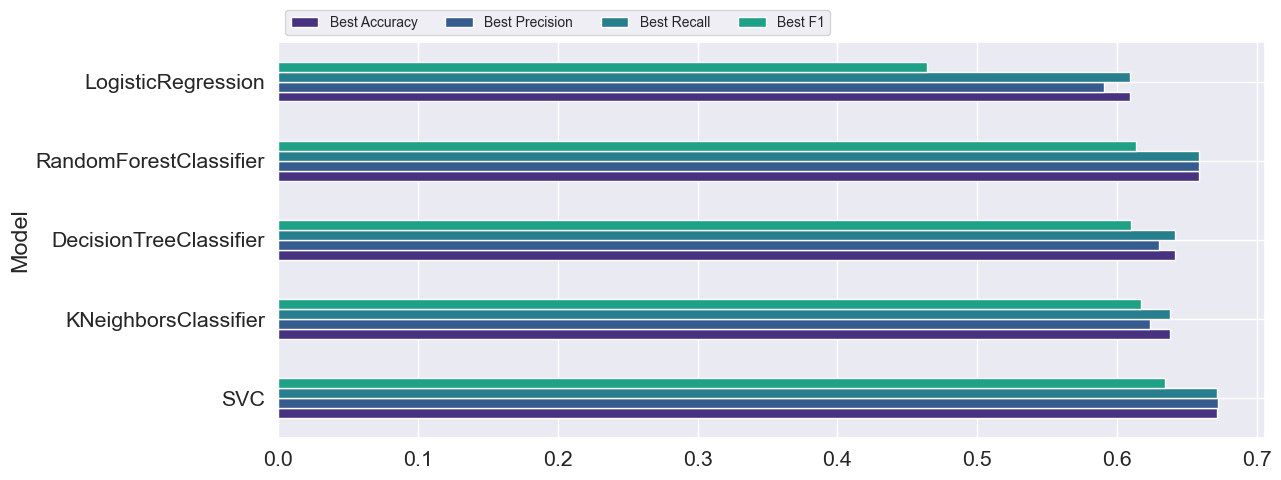

In [71]:
print(display(results_df)) # Imprimiendo los resultados
plot_model_comparison(results_df)  # Pasa el DataFrame con los resultados